<a href="https://colab.research.google.com/github/zanifer/Comparison_of_Accuracy_between_Deviation_and_Lcs/blob/main/Comparison_of_Accuracy_between_Deviation_and_Lcs(Testing_year13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Here, Loading Dataset...**

In [4]:
train11 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC11.csv')
train11.head()

,NAME,FATHER,MOTHER,SESSION,PASS_YE,GPA,RESULT,INST_,EXAM_,STUD_GROUP,STUD_TYPE,GRD_MARK,SEX,SESSION.1,PASS_YE.1,GPA.1,INST_.1,EXAM_.1,RESULT.1,STUD_GROUP.1,STUD_TYPE.1,LTRGRD,STUD_S
0,MOHAMMAD. TARIK AZIZ,MD. ALAMGIR,MRS. MONJU ALAM,2007-08,2009,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2009-10,2011,5.0,1150,NaN,PASS,SCIENCE,REGULAR,"101:A ,107:A+,127:A+,174:A+,176:A+,178:A+",0
1,MD. NAFIS IMTIYAZ,DR. MD. FORHADUL ALAM,RAFIKA SULTANA,2007-08,2009,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2009-10,2011,5.0,1150,NaN,PASS,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0
2,AMINUL ISLAM,MD. CHAN MAMUD MIAH,AMENA AKTER,2007-08,2009,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2009-10,2011,5.0,1150,NaN,PASS,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0
3,ERATOSH CHAKMA,SUBHASH CHANDRA CHAKMA,ARATI CHAKMA,2007-08,2009,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,113:A+,136:A+,137:...",0,2009-10,2011,5.0,1150,NaN,PASS,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0
4,M. M. HARUN- UR- RASHID,MD. ABDUS SALAM,MUSUMMAT RAWSHANARA BEGUM,2007-08,2009,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2009-10,2011,5.0,1150,NaN,PASS,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0


In [5]:
train12 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC12.csv')
train12.head()

,NAME,FATHER,MOTHER,SESSION,PASS_YE,GPA,RESULT,INST_,EXAM_,STUD_GROUP,STUD_TYPE,GRD_MARK,SEX,SESSION.1,PASS_YE.1,GPA.1,INST_.1,EXAM_.1,RESULT.1,STUD_GROUP.1,STUD_TYPE.1,LTRGRD,STUD_S
0,M. RABIUL ISLAM SHAJIB,MD. SALAMOT ULLAH,MRS. SHEFALI AKTER,2008-09,2010,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2010-11,2012,5.0,1150,HSC,P,SCIENCE,REGULAR,"101:A+,107:A+,127:A ,174:A+,176:A+,178:A+",0
1,SHEIKH SADI,MD. ABDUL HAKIM,JASMIN AKTER,2008-09,2010,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2010-11,2012,5.0,1150,HSC,P,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,180:A+",0
2,TAHSIN ISPAT HIRA,MD. ELEASE KHAN,ROUSHONARA MASUDA,2008-09,2010,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2010-11,2012,5.0,1150,HSC,P,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,180:A+",0
3,MEHEDI HASAN RAKIB,MD. TAJUL ISLAM,ROKEYA BEGUM,2008-09,2010,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2010-11,2012,5.0,1150,HSC,P,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0
4,ABU HANIF MD. SHEHANUK,MD. ABDUL AZIZ,KHODEJA BEGUM,2008-09,2010,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2010-11,2012,4.9,1150,HSC,P,SCIENCE,REGULAR,"101:A+,107:A+,127:A ,174:A ,176:A+,178:A-",0


In [6]:
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC13.csv')
test.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NAME,FATHER,MOTHER,SESSION,PASS_YE,GPA,RESULT,INST_,EXAM_,STUD_GROUP,STUD_TYPE,GRD_MARK,SEX,SESSION.1,PASS_YE.1,GPA.1,INST_.1,EXAM_.1,RESULT.1,STUD_GROUP.1,STUD_TYPE.1,LTRGRD,STUD_S
0,MD. GOLAM DASTGIR,MD. GOLAM HOSSAIN,MRS. FARHANA HOSSAIN,2009-10,2011,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2011-12,2013,5.0,1150,HSC,P,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,129:A+",0
1,SM. SALMAN ISTIAQUE,MD. AKBOR HOSSAIN,SALMA SULTANA,2009-10,2011,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2011-12,2013,5.0,1150,HSC,P,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0
2,MD. SIRAJUL MORSALIN,MD. ANISUR RAHMAN KHAN,MARUFA KHANUM,2009-10,2011,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2011-12,2013,5.0,1150,HSC,P,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0
3,MD. ZIAUL ISLAM,MD. ABDUL HAI,MRS. SHAMIM ARA BEGUM,2009-10,2011,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2011-12,2013,5.0,1150,HSC,P,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0
4,MD. MARZIUL HOSSAIN TONMOY,MD. MOAZZEM HOSSAIN,MRS. SHAMIMA NASRIN,2009-10,2011,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2011-12,2013,5.0,1150,HSC,P,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0


In [7]:
dataset = [train11, train12, test]
t_df=pd.concat(dataset,ignore_index =True)
t_df.shape

(89731, 23)

In [8]:
frame = [train11,train12]
train=pd.concat(frame,ignore_index= True)
train.head()

,NAME,FATHER,MOTHER,SESSION,PASS_YE,GPA,RESULT,INST_,EXAM_,STUD_GROUP,STUD_TYPE,GRD_MARK,SEX,SESSION.1,PASS_YE.1,GPA.1,INST_.1,EXAM_.1,RESULT.1,STUD_GROUP.1,STUD_TYPE.1,LTRGRD,STUD_S
0,MOHAMMAD. TARIK AZIZ,MD. ALAMGIR,MRS. MONJU ALAM,2007-08,2009,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2009-10,2011,5.0,1150,NaN,PASS,SCIENCE,REGULAR,"101:A ,107:A+,127:A+,174:A+,176:A+,178:A+",0
1,MD. NAFIS IMTIYAZ,DR. MD. FORHADUL ALAM,RAFIKA SULTANA,2007-08,2009,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2009-10,2011,5.0,1150,NaN,PASS,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0
2,AMINUL ISLAM,MD. CHAN MAMUD MIAH,AMENA AKTER,2007-08,2009,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2009-10,2011,5.0,1150,NaN,PASS,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0
3,ERATOSH CHAKMA,SUBHASH CHANDRA CHAKMA,ARATI CHAKMA,2007-08,2009,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,113:A+,136:A+,137:...",0,2009-10,2011,5.0,1150,NaN,PASS,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0
4,M. M. HARUN- UR- RASHID,MD. ABDUS SALAM,MUSUMMAT RAWSHANARA BEGUM,2007-08,2009,5.0,P,1000,NaN,SCIENCE,REGULAR,"101:A+,107:A+,109:A+,145:A+,111:A+,136:A+,137:...",0,2009-10,2011,5.0,1150,NaN,PASS,SCIENCE,REGULAR,"101:A+,107:A+,127:A+,174:A+,176:A+,178:A+",0


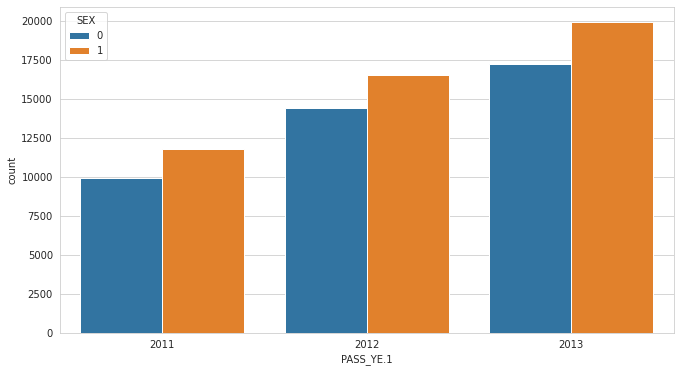

In [12]:
plt.figure(figsize= (11,6))
sns.set_style("whitegrid")
sns.countplot(x='PASS_YE.1', hue='SEX',data = t_df)

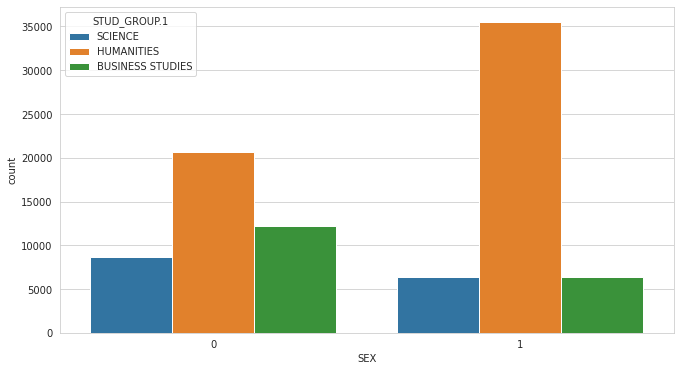

In [14]:
plt.figure(figsize= (11,6))
sns.set_style("whitegrid")
#plt.style.use('seaborn')
sns.countplot(x='SEX', hue='STUD_GROUP.1',data = t_df)

**Data preparation**
*Handle Missing Values and Handle Categorical Values*

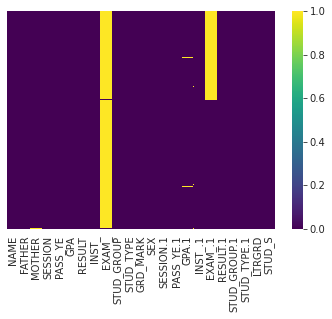

In [15]:
sns.heatmap(train.isnull(),yticklabels= False,cmap='viridis')

In [16]:
train.isnull().sum()

NAME                0
FATHER              0
MOTHER             23
SESSION             0
PASS_YE             0
GPA                 0
RESULT              0
INST_               0
EXAM_           52272
STUD_GROUP          0
STUD_TYPE           0
GRD_MARK            0
SEX                 0
SESSION.1           0
PASS_YE.1           0
GPA.1             498
INST_.1             0
EXAM_.1         21705
RESULT.1            0
STUD_GROUP.1        0
STUD_TYPE.1         0
LTRGRD              0
STUD_S              0
dtype: int64

In [17]:
test.isnull().sum()

NAME                0
FATHER              0
MOTHER             10
SESSION             0
PASS_YE             0
GPA                 0
RESULT              0
INST_               0
EXAM_           37076
STUD_GROUP          0
STUD_TYPE           0
GRD_MARK            0
SEX                 0
SESSION.1           0
PASS_YE.1           0
GPA.1             284
INST_.1             0
EXAM_.1             0
RESULT.1            0
STUD_GROUP.1        0
STUD_TYPE.1         0
LTRGRD              0
STUD_S              0
dtype: int64

In [18]:
tnd= train.loc[(train["RESULT.1"]=="ABSENT")].index
tst= test.loc[(test["RESULT.1"]=="ABSENT")].index
train.drop(tnd, inplace = True)
test.drop(tst, inplace = True) 

In [19]:
train.isnull().sum()

NAME                0
FATHER              0
MOTHER             22
SESSION             0
PASS_YE             0
GPA                 0
RESULT              0
INST_               0
EXAM_           52079
STUD_GROUP          0
STUD_TYPE           0
GRD_MARK            0
SEX                 0
SESSION.1           0
PASS_YE.1           0
GPA.1             293
INST_.1             0
EXAM_.1         21500
RESULT.1            0
STUD_GROUP.1        0
STUD_TYPE.1         0
LTRGRD              0
STUD_S              0
dtype: int64

In [20]:
test.isnull().sum()

NAME                0
FATHER              0
MOTHER             10
SESSION             0
PASS_YE             0
GPA                 0
RESULT              0
INST_               0
EXAM_           37076
STUD_GROUP          0
STUD_TYPE           0
GRD_MARK            0
SEX                 0
SESSION.1           0
PASS_YE.1           0
GPA.1             284
INST_.1             0
EXAM_.1             0
RESULT.1            0
STUD_GROUP.1        0
STUD_TYPE.1         0
LTRGRD              0
STUD_S              0
dtype: int64

In [21]:
features_drop = ['NAME','FATHER','MOTHER','SESSION','PASS_YE','RESULT','EXAM_','STUD_TYPE','EXAM_.1','STUD_TYPE.1','PASS_YE.1','GRD_MARK','SESSION.1','RESULT.1','LTRGRD','STUD_S']
train = train.drop(features_drop, axis=1)
test= test.drop(features_drop, axis=1)
train.head()


,GPA,INST_,STUD_GROUP,SEX,GPA.1,INST_.1,STUD_GROUP.1
0,5.0,1000,SCIENCE,0,5.0,1150,SCIENCE
1,5.0,1000,SCIENCE,0,5.0,1150,SCIENCE
2,5.0,1000,SCIENCE,0,5.0,1150,SCIENCE
3,5.0,1000,SCIENCE,0,5.0,1150,SCIENCE
4,5.0,1000,SCIENCE,0,5.0,1150,SCIENCE


In [22]:
train_data = [train] 
test_data = [test]
group_mapping = {"SCIENCE": 0, "HUMANITIES": 1, "BUSINESS STUDIES": 2}
for i in train_data:
    i['STUD_GROUP'] = i['STUD_GROUP'].map(group_mapping)
    i['STUD_GROUP.1'] = i['STUD_GROUP.1'].map(group_mapping)
for i in test_data:
    i['STUD_GROUP'] = i['STUD_GROUP'].map(group_mapping)
    i['STUD_GROUP.1'] = i['STUD_GROUP.1'].map(group_mapping)
train.head()

,GPA,INST_,STUD_GROUP,SEX,GPA.1,INST_.1,STUD_GROUP.1
0,5.0,1000,0,0,5.0,1150,0
1,5.0,1000,0,0,5.0,1150,0
2,5.0,1000,0,0,5.0,1150,0
3,5.0,1000,0,0,5.0,1150,0
4,5.0,1000,0,0,5.0,1150,0


In [23]:
test.head()

,GPA,INST_,STUD_GROUP,SEX,GPA.1,INST_.1,STUD_GROUP.1
0,5.0,1000,0,0,5.0,1150,0
1,5.0,1000,0,0,5.0,1150,0
2,5.0,1000,0,0,5.0,1150,0
3,5.0,1000,0,0,5.0,1150,0
4,5.0,1000,0,0,5.0,1150,0


In [24]:
train = train.dropna(axis = 0, how ='any') 
test = test.dropna(axis = 0, how ='any') 

In [25]:
train.isnull().sum()

GPA             0
INST_           0
STUD_GROUP      0
SEX             0
GPA.1           0
INST_.1         0
STUD_GROUP.1    0
dtype: int64

In [26]:
test.isnull().sum()

GPA             0
INST_           0
STUD_GROUP      0
SEX             0
GPA.1           0
INST_.1         0
STUD_GROUP.1    0
dtype: int64

***Creating Category***

In [27]:
train.shape

(52110, 7)

In [28]:
criteria = [train['GPA'].between(5.0,5.0), train['GPA'].between(4.5,5.0), train['GPA'].between(4.0,4.50), train['GPA'].between(3.5,4.0),train['GPA'].between(3.0,3.50),train['GPA'].between(2.5,3.0),train['GPA'].between(2.0,2.50),train['GPA'].between(1.5,2.0),train['GPA'].between(1.0,1.5)]
values = ['5.0','4.5-5.0', '4.0-4.5', '3.5-4.0', '3.0-3.5','2.5-3.0', '2.0-2.5','1.5-2.0','1.0-1.5']
train= train.assign(SSC_GPA_CATEGORY = np.select(criteria, values))
train.head()

,GPA,INST_,STUD_GROUP,SEX,GPA.1,INST_.1,STUD_GROUP.1,SSC_GPA_CATEGORY
0,5.0,1000,0,0,5.0,1150,0,5.0
1,5.0,1000,0,0,5.0,1150,0,5.0
2,5.0,1000,0,0,5.0,1150,0,5.0
3,5.0,1000,0,0,5.0,1150,0,5.0
4,5.0,1000,0,0,5.0,1150,0,5.0


In [29]:
criteria = [test['GPA'].between(5.0,5.0), test['GPA'].between(4.5,5.0), test['GPA'].between(4.0,4.50), test['GPA'].between(3.5,4.0),test['GPA'].between(3.0,3.50),test['GPA'].between(2.5,3.0),test['GPA'].between(2.0,2.50),test['GPA'].between(1.5,2.0),test['GPA'].between(1.0,1.5)]
values = ['5.0','4.5-5.0', '4.0-4.5', '3.5-4.0', '3.0-3.5','2.5-3.0', '2.0-2.5','1.5-2.0','1.0-1.5']
test= test.assign(SSC_GPA_CATEGORY = np.select(criteria, values))
test.head()

,GPA,INST_,STUD_GROUP,SEX,GPA.1,INST_.1,STUD_GROUP.1,SSC_GPA_CATEGORY
0,5.0,1000,0,0,5.0,1150,0,5.0
1,5.0,1000,0,0,5.0,1150,0,5.0
2,5.0,1000,0,0,5.0,1150,0,5.0
3,5.0,1000,0,0,5.0,1150,0,5.0
4,5.0,1000,0,0,5.0,1150,0,5.0


In [30]:
for i in range(1,10,9):
    print("train_category"+str(i+0)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='5.0')]","\n"+
 "train_category"+str(i+1)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')]","\n"+
"train_category"+str(i+2)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')]","\n"+
"train_category"+str(i+3)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')]","\n"+
"train_category"+str(i+4)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')]","\n"+
"train_category"+str(i+5)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')]","\n"+
"train_category"+str(i+6)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')]","\n"+ 
"train_category"+str(i+7)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')]","\n"+
"train_category"+str(i+8)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')]","\n")

train_category1  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category2  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category3  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category4  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category5  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category6  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category7  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category8  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category9  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SS

In [31]:
for i in range(1,10,9):
    print("test_category"+str(i+0)," = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='5.0')]","\n"+
 "test_category"+str(i+1)," = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')]","\n"+
"test_category"+str(i+2)," = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')]","\n"+
"test_category"+str(i+3)," = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')]","\n"+
"test_category"+str(i+4)," = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')]","\n"+
"test_category"+str(i+5)," = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')]","\n"+
"test_category"+str(i+6)," = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')]","\n"+ 
"test_category"+str(i+7)," = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')]","\n"+
"test_category"+str(i+8)," = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')]","\n")

test_category1  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category2  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category3  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category4  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category5  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category6  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category7  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category8  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category9  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 



In [32]:
train_category1  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category2  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category3  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category4  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category5  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category6  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category7  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category8  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category9  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 

train_category10  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category11  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category12  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category13  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category14  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category15  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category16  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category17  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category18  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 

train_category19  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category20  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category21  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category22  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category23  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category24  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category25  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category26  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category27  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 

train_category28  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category29  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category30  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category31  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category32  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category33  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category34  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category35  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category36  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 

train_category37  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category38  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category39  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category40  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category41  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category42  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category43  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category44  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category45  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 

train_category46  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category47  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category48  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category49  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category50  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category51  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category52  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category53  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category54  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 
train_category1.head()

,GPA,INST_,STUD_GROUP,SEX,GPA.1,INST_.1,STUD_GROUP.1,SSC_GPA_CATEGORY
0,5.0,1000,0,0,5.0,1150,0,5.0
1,5.0,1000,0,0,5.0,1150,0,5.0
2,5.0,1000,0,0,5.0,1150,0,5.0
3,5.0,1000,0,0,5.0,1150,0,5.0
4,5.0,1000,0,0,5.0,1150,0,5.0


In [33]:
test_category1  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category2  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category3  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category4  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category5  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category6  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category7  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category8  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category9  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 

test_category10  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category11  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category12  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category13  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category14  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category15  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category16  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category17  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category18  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 

test_category19  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category20  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category21  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category22  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category23  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category24  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category25  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category26  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category27  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 

test_category28  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category29  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category30  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category31  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category32  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category33  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category34  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category35  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category36  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 

test_category37  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category38  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category39  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category40  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category41  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category42  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category43  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category44  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category45  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 

test_category46  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category47  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category48  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category49  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category50  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category51  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category52  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category53  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category54  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 
test_category1.head(5)

,GPA,INST_,STUD_GROUP,SEX,GPA.1,INST_.1,STUD_GROUP.1,SSC_GPA_CATEGORY
0,5.0,1000,0,0,5.0,1150,0,5.0
1,5.0,1000,0,0,5.0,1150,0,5.0
2,5.0,1000,0,0,5.0,1150,0,5.0
3,5.0,1000,0,0,5.0,1150,0,5.0
4,5.0,1000,0,0,5.0,1150,0,5.0


In [34]:
for i in range(1,1):
    #print("test_category"+str(i)+"['CATEGORY']="+str(i))
    print("train_category"+str(i)+"= train_category"+str(i)+".assign(CATEGORY="+str(i)+")")


In [35]:
for i in range(1,1):
    #print("test_category"+str(i)+"['CATEGORY']="+str(i))
    print("test_category"+str(i)+"= test_category"+str(i)+".assign(CATEGORY="+str(i)+")")


In [36]:
test_category1= test_category1.assign(CATEGORY=1)
test_category2= test_category2.assign(CATEGORY=2)
test_category3= test_category3.assign(CATEGORY=3)
test_category4= test_category4.assign(CATEGORY=4)
test_category5= test_category5.assign(CATEGORY=5)
test_category6= test_category6.assign(CATEGORY=6)
test_category7= test_category7.assign(CATEGORY=7)
test_category8= test_category8.assign(CATEGORY=8)
test_category9= test_category9.assign(CATEGORY=9)
test_category10= test_category10.assign(CATEGORY=10)
test_category11= test_category11.assign(CATEGORY=11)
test_category12= test_category12.assign(CATEGORY=12)
test_category13= test_category13.assign(CATEGORY=13)
test_category14= test_category14.assign(CATEGORY=14)
test_category15= test_category15.assign(CATEGORY=15)
test_category16= test_category16.assign(CATEGORY=16)
test_category17= test_category17.assign(CATEGORY=17)
test_category18= test_category18.assign(CATEGORY=18)
test_category19= test_category19.assign(CATEGORY=19)
test_category20= test_category20.assign(CATEGORY=20)
test_category21= test_category21.assign(CATEGORY=21)
test_category22= test_category22.assign(CATEGORY=22)
test_category23= test_category23.assign(CATEGORY=23)
test_category24= test_category24.assign(CATEGORY=24)
test_category25= test_category25.assign(CATEGORY=25)
test_category26= test_category26.assign(CATEGORY=26)
test_category27= test_category27.assign(CATEGORY=27)
test_category28= test_category28.assign(CATEGORY=28)
test_category29= test_category29.assign(CATEGORY=29)
test_category30= test_category30.assign(CATEGORY=30)
test_category31= test_category31.assign(CATEGORY=31)
test_category32= test_category32.assign(CATEGORY=32)
test_category33= test_category33.assign(CATEGORY=33)
test_category34= test_category34.assign(CATEGORY=34)
test_category35= test_category35.assign(CATEGORY=35)
test_category36= test_category36.assign(CATEGORY=36)
test_category37= test_category37.assign(CATEGORY=37)
test_category38= test_category38.assign(CATEGORY=38)
test_category39= test_category39.assign(CATEGORY=39)
test_category40= test_category40.assign(CATEGORY=40)
test_category41= test_category41.assign(CATEGORY=41)
test_category42= test_category42.assign(CATEGORY=42)
test_category43= test_category43.assign(CATEGORY=43)
test_category44= test_category44.assign(CATEGORY=44)
test_category45= test_category45.assign(CATEGORY=45)
test_category46= test_category46.assign(CATEGORY=46)
test_category47= test_category47.assign(CATEGORY=47)
test_category48= test_category48.assign(CATEGORY=48)
test_category49= test_category49.assign(CATEGORY=49)
test_category50= test_category50.assign(CATEGORY=50)
test_category51= test_category51.assign(CATEGORY=51)
test_category52= test_category52.assign(CATEGORY=52)
test_category53= test_category53.assign(CATEGORY=53)
test_category54= test_category54.assign(CATEGORY=54)
test_category1.head()

,GPA,INST_,STUD_GROUP,SEX,GPA.1,INST_.1,STUD_GROUP.1,SSC_GPA_CATEGORY,CATEGORY
0,5.0,1000,0,0,5.0,1150,0,5.0,1
1,5.0,1000,0,0,5.0,1150,0,5.0,1
2,5.0,1000,0,0,5.0,1150,0,5.0,1
3,5.0,1000,0,0,5.0,1150,0,5.0,1
4,5.0,1000,0,0,5.0,1150,0,5.0,1


In [37]:
train_category1= train_category1.assign(CATEGORY=1)
train_category2= train_category2.assign(CATEGORY=2)
train_category3= train_category3.assign(CATEGORY=3)
train_category4= train_category4.assign(CATEGORY=4)
train_category5= train_category5.assign(CATEGORY=5)
train_category6= train_category6.assign(CATEGORY=6)
train_category7= train_category7.assign(CATEGORY=7)
train_category8= train_category8.assign(CATEGORY=8)
train_category9= train_category9.assign(CATEGORY=9)
train_category10= train_category10.assign(CATEGORY=10)
train_category11= train_category11.assign(CATEGORY=11)
train_category12= train_category12.assign(CATEGORY=12)
train_category13= train_category13.assign(CATEGORY=13)
train_category14= train_category14.assign(CATEGORY=14)
train_category15= train_category15.assign(CATEGORY=15)
train_category16= train_category16.assign(CATEGORY=16)
train_category17= train_category17.assign(CATEGORY=17)
train_category18= train_category18.assign(CATEGORY=18)
train_category19= train_category19.assign(CATEGORY=19)
train_category20= train_category20.assign(CATEGORY=20)
train_category21= train_category21.assign(CATEGORY=21)
train_category22= train_category22.assign(CATEGORY=22)
train_category23= train_category23.assign(CATEGORY=23)
train_category24= train_category24.assign(CATEGORY=24)
train_category25= train_category25.assign(CATEGORY=25)
train_category26= train_category26.assign(CATEGORY=26)
train_category27= train_category27.assign(CATEGORY=27)
train_category28= train_category28.assign(CATEGORY=28)
train_category29= train_category29.assign(CATEGORY=29)
train_category30= train_category30.assign(CATEGORY=30)
train_category31= train_category31.assign(CATEGORY=31)
train_category32= train_category32.assign(CATEGORY=32)
train_category33= train_category33.assign(CATEGORY=33)
train_category34= train_category34.assign(CATEGORY=34)
train_category35= train_category35.assign(CATEGORY=35)
train_category36= train_category36.assign(CATEGORY=36)
train_category37= train_category37.assign(CATEGORY=37)
train_category38= train_category38.assign(CATEGORY=38)
train_category39= train_category39.assign(CATEGORY=39)
train_category40= train_category40.assign(CATEGORY=40)
train_category41= train_category41.assign(CATEGORY=41)
train_category42= train_category42.assign(CATEGORY=42)
train_category43= train_category43.assign(CATEGORY=43)
train_category44= train_category44.assign(CATEGORY=44)
train_category45= train_category45.assign(CATEGORY=45)
train_category46= train_category46.assign(CATEGORY=46)
train_category47= train_category47.assign(CATEGORY=47)
train_category48= train_category48.assign(CATEGORY=48)
train_category49= train_category49.assign(CATEGORY=49)
train_category50= train_category50.assign(CATEGORY=50)
train_category51= train_category51.assign(CATEGORY=51)
train_category52= train_category52.assign(CATEGORY=52)
train_category53= train_category53.assign(CATEGORY=53)
train_category54= train_category54.assign(CATEGORY=54)
train_category1

,GPA,INST_,STUD_GROUP,SEX,GPA.1,INST_.1,STUD_GROUP.1,SSC_GPA_CATEGORY,CATEGORY
0,5.0,1000,0,0,5.0,1150,0,5.0,1
1,5.0,1000,0,0,5.0,1150,0,5.0,1
2,5.0,1000,0,0,5.0,1150,0,5.0,1
3,5.0,1000,0,0,5.0,1150,0,5.0,1
4,5.0,1000,0,0,5.0,1150,0,5.0,1
...,...,...,...,...,...,...,...,...,...
51139,5.0,2525,0,0,5.0,1004,0,5.0,1
51338,5.0,2600,0,0,4.0,1000,0,5.0,1
51350,5.0,2625,0,0,2.9,2500,0,5.0,1
51536,5.0,2703,0,0,4.3,1004,0,5.0,1


*visualization category*

In [38]:
train_cate_frame =[train_category1, train_category2, train_category3, train_category4, train_category5, train_category6, train_category7, train_category8, train_category9, train_category10, train_category11, train_category12, train_category13, train_category14, train_category15, train_category16, train_category17, train_category18, train_category19, train_category20, train_category21, train_category22, train_category23, train_category24, train_category25, train_category26, train_category27, train_category28, train_category29, train_category30, train_category31, train_category32, train_category33, train_category34, train_category35, train_category36, train_category37, train_category38, train_category39, train_category40, train_category41, train_category42,train_category43, train_category44, train_category45, train_category46, train_category47, train_category48, train_category49, train_category50, train_category51, train_category52, train_category53, train_category54]
train_cate =pd.concat(train_cate_frame,ignore_index=True)
train_cate.shape

(52110, 9)

In [39]:
cate_tn = train_cate['CATEGORY'].value_counts().rename_axis('CATEGORY').reset_index(name='Number of students').sort_values(by='CATEGORY')  
cate_tn = cate_tn.reset_index()

cate_tn= cate_tn.drop(columns='index',inplace=False)
cate_tn

,CATEGORY,Number of students
0,1,1671
1,2,1286
2,3,1526
3,4,1437
4,5,1014
5,6,452
6,7,93
7,8,5
8,10,48
9,11,367


In [40]:
cate_tn.max()

CATEGORY                53
Number of students    5514
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 5700.0)

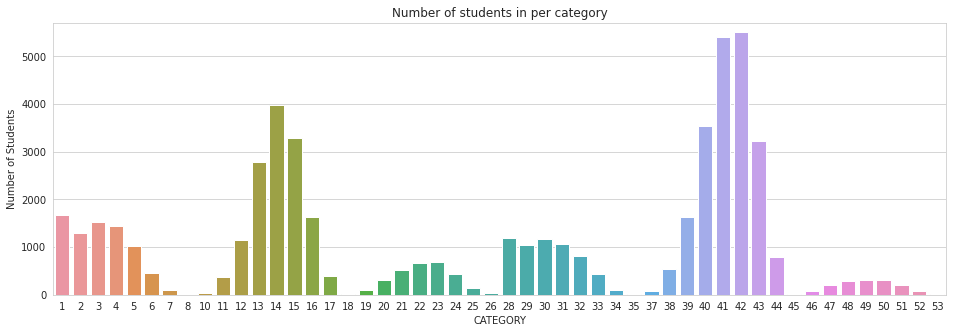

In [90]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,5

x= cate_tn['CATEGORY']
y =cate_tn['Number of students']
sns.barplot(x,y)
plt.xlabel('CATEGORY')
plt.ylabel('Number of Students')
plt.title("Number of students in per category")
plt.ylim(0,5700)



**Deviation Calculation**

In [42]:
for number in range(1,2) :  
    print( 
        "train_count"+str(number),"=","train_category"+str(number)+"['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1')","\n"+
        "train_gpa"+str(number),"=" ,"train_category"+str(number)+".groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean()","\n"+
"train_gpa"+str(number), "=","train_gpa"+str(number)+".reset_index()","\n"+
"train_hsc"+str(number),"=","pd.merge(train_count"+str(number)+","+"train_gpa"+str(number)+")","\n"+
"train_hsc"+str(number),"=","train_hsc"+str(number)+".loc[(train_hsc"+str(number),"['Number of students in training year']>=40)]","\n"+
"train_hsc"+str(number)+"['Deviation of training year'] = train_hsc"+str(number),"['GPA.1'] - train_hsc"+str(number)+"['GPA']","\n"+
          
"train_hsc"+str(number),"=","pd.concat([train_hsc"+str(number)+"[train_hsc"+str(number),"['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False),","\n"+
                              "train_hsc"+str(number)+"[train_hsc"+str(number)+"['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)])","\n"+
"train_hsc"+str(number), "=","train_hsc"+str(number)+".reset_index()","\n"+
"features_drop"+str(number), "=","['index']","\n"+          
"train_hsc"+str(number), "=","train_hsc"+str(number)+".drop(features_drop"+str(number),",axis=1)","\n"+
"train_hsc"+str(number)+".head()","\n")        

train_count1 = train_category1['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa1 = train_category1.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa1 = train_gpa1.reset_index() 
train_hsc1 = pd.merge(train_count1,train_gpa1) 
train_hsc1 = train_hsc1.loc[(train_hsc1 ['Number of students in training year']>=40)] 
train_hsc1['Deviation of training year'] = train_hsc1 ['GPA.1'] - train_hsc1['GPA'] 
train_hsc1 = pd.concat([train_hsc1[train_hsc1 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc1[train_hsc1['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc1 = train_hsc1.reset_index() 
features_drop1 = ['index'] 
train_hsc1 = train_hsc1.drop(features_drop1 ,axis=1) 
train_hsc1.head() 



In [43]:
for number in range(1,2) :  
    print("test_count"+str(number),"=","test_category"+str(number)+"['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1')","\n"+
"test_gpa"+str(number),"=" ,"test_category"+str(number)+".groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean()","\n"+      
"test_gpa"+str(number), "=","test_gpa"+str(number)+".reset_index()","\n"+
          
"test_hsc"+str(number),"=","pd.merge(test_count"+str(number)+","+"test_gpa"+str(number)+")","\n"+
"test_hsc"+str(number),"=","test_hsc"+str(number)+".loc[(test_hsc"+str(number),"['Number of students in testing year']>=20)]","\n"+

"test_hsc"+str(number)+"['Deviation of testing year'] = test_hsc"+str(number)+"['GPA.1'] - test_hsc"+str(number)+"['GPA']","\n"+
          
"test_hsc"+str(number),"=","pd.concat([test_hsc"+str(number)+"[test_hsc"+str(number),"['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False),","\n"+
                              "test_hsc"+str(number)+"[test_hsc"+str(number)+"['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)])","\n"+
"test_hsc"+str(number), "=","test_hsc"+str(number)+".reset_index()","\n"+
"features_drop"+str(number), "=","['index']","\n"+          
"test_hsc"+str(number), "=","test_hsc"+str(number)+".drop(features_drop"+str(number),",axis=1)","\n"+
"test_hsc"+str(number)+".head()","\n"+
"if (len(test_hsc"+str(number)+")>=5):","\n"+
"  print('test_hsc"+str(number)+".shape')","\n"+
"else:","\n"+
"  print('del test_hsc"+str(number)+"')","\n")


test_count1 = test_category1['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa1 = test_category1.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa1 = test_gpa1.reset_index() 
test_hsc1 = pd.merge(test_count1,test_gpa1) 
test_hsc1 = test_hsc1.loc[(test_hsc1 ['Number of students in testing year']>=20)] 
test_hsc1['Deviation of testing year'] = test_hsc1['GPA.1'] - test_hsc1['GPA'] 
test_hsc1 = pd.concat([test_hsc1[test_hsc1 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc1[test_hsc1['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc1 = test_hsc1.reset_index() 
features_drop1 = ['index'] 
test_hsc1 = test_hsc1.drop(features_drop1 ,axis=1) 
test_hsc1.head() 
if (len(test_hsc1)>=5): 
  print('test_hsc1.shape') 
else: 
  print('del test_hsc1') 



In [44]:
train_count1 = train_category1['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa1 = train_category1.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa1 = train_gpa1.reset_index() 
train_hsc1 = pd.merge(train_count1,train_gpa1) 
train_hsc1 = train_hsc1.loc[(train_hsc1 ['Number of students in training year']>=40)] 
train_hsc1['Deviation of training year'] = train_hsc1 ['GPA.1'] - train_hsc1['GPA'] 
train_hsc1 = pd.concat([train_hsc1[train_hsc1 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc1[train_hsc1['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc1 = train_hsc1.reset_index() 
features_drop1 = ['index'] 
train_hsc1 = train_hsc1.drop(features_drop1 ,axis=1) 
train_hsc1.head() 

train_count2 = train_category2['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa2 = train_category2.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa2 = train_gpa2.reset_index() 
train_hsc2 = pd.merge(train_count2,train_gpa2) 
train_hsc2 = train_hsc2.loc[(train_hsc2 ['Number of students in training year']>=40)] 
train_hsc2['Deviation of training year'] = train_hsc2 ['GPA.1'] - train_hsc2['GPA'] 
train_hsc2 = pd.concat([train_hsc2[train_hsc2 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc2[train_hsc2['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc2 = train_hsc2.reset_index() 
features_drop2 = ['index'] 
train_hsc2 = train_hsc2.drop(features_drop2 ,axis=1) 
train_hsc2.head() 

train_count3 = train_category3['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa3 = train_category3.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa3 = train_gpa3.reset_index() 
train_hsc3 = pd.merge(train_count3,train_gpa3) 
train_hsc3 = train_hsc3.loc[(train_hsc3 ['Number of students in training year']>=40)] 
train_hsc3['Deviation of training year'] = train_hsc3 ['GPA.1'] - train_hsc3['GPA'] 
train_hsc3 = pd.concat([train_hsc3[train_hsc3 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc3[train_hsc3['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc3 = train_hsc3.reset_index() 
features_drop3 = ['index'] 
train_hsc3 = train_hsc3.drop(features_drop3 ,axis=1) 
train_hsc3.head() 

train_count4 = train_category4['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa4 = train_category4.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa4 = train_gpa4.reset_index() 
train_hsc4 = pd.merge(train_count4,train_gpa4) 
train_hsc4 = train_hsc4.loc[(train_hsc4 ['Number of students in training year']>=40)] 
train_hsc4['Deviation of training year'] = train_hsc4 ['GPA.1'] - train_hsc4['GPA'] 
train_hsc4 = pd.concat([train_hsc4[train_hsc4 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc4[train_hsc4['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc4 = train_hsc4.reset_index() 
features_drop4 = ['index'] 
train_hsc4 = train_hsc4.drop(features_drop4 ,axis=1) 
train_hsc4.head() 

train_count5 = train_category5['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa5 = train_category5.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa5 = train_gpa5.reset_index() 
train_hsc5 = pd.merge(train_count5,train_gpa5) 
train_hsc5 = train_hsc5.loc[(train_hsc5 ['Number of students in training year']>=40)] 
train_hsc5['Deviation of training year'] = train_hsc5 ['GPA.1'] - train_hsc5['GPA'] 
train_hsc5 = pd.concat([train_hsc5[train_hsc5 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc5[train_hsc5['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc5 = train_hsc5.reset_index() 
features_drop5 = ['index'] 
train_hsc5 = train_hsc5.drop(features_drop5 ,axis=1) 
train_hsc5.head() 

train_count6 = train_category6['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa6 = train_category6.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa6 = train_gpa6.reset_index() 
train_hsc6 = pd.merge(train_count6,train_gpa6) 
train_hsc6 = train_hsc6.loc[(train_hsc6 ['Number of students in training year']>=40)] 
train_hsc6['Deviation of training year'] = train_hsc6 ['GPA.1'] - train_hsc6['GPA'] 
train_hsc6 = pd.concat([train_hsc6[train_hsc6 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc6[train_hsc6['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc6 = train_hsc6.reset_index() 
features_drop6 = ['index'] 
train_hsc6 = train_hsc6.drop(features_drop6 ,axis=1) 
train_hsc6.head() 

train_count7 = train_category7['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa7 = train_category7.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa7 = train_gpa7.reset_index() 
train_hsc7 = pd.merge(train_count7,train_gpa7) 
train_hsc7 = train_hsc7.loc[(train_hsc7 ['Number of students in training year']>=40)] 
train_hsc7['Deviation of training year'] = train_hsc7 ['GPA.1'] - train_hsc7['GPA'] 
train_hsc7 = pd.concat([train_hsc7[train_hsc7 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc7[train_hsc7['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc7 = train_hsc7.reset_index() 
features_drop7 = ['index'] 
train_hsc7 = train_hsc7.drop(features_drop7 ,axis=1) 
train_hsc7.head() 

train_count8 = train_category8['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa8 = train_category8.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa8 = train_gpa8.reset_index() 
train_hsc8 = pd.merge(train_count8,train_gpa8) 
train_hsc8 = train_hsc8.loc[(train_hsc8 ['Number of students in training year']>=40)] 
train_hsc8['Deviation of training year'] = train_hsc8 ['GPA.1'] - train_hsc8['GPA'] 
train_hsc8 = pd.concat([train_hsc8[train_hsc8 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc8[train_hsc8['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc8 = train_hsc8.reset_index() 
features_drop8 = ['index'] 
train_hsc8 = train_hsc8.drop(features_drop8 ,axis=1) 
train_hsc8.head() 

train_count9 = train_category9['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa9 = train_category9.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa9 = train_gpa9.reset_index() 
train_hsc9 = pd.merge(train_count9,train_gpa9) 
train_hsc9 = train_hsc9.loc[(train_hsc9 ['Number of students in training year']>=40)] 
train_hsc9['Deviation of training year'] = train_hsc9 ['GPA.1'] - train_hsc9['GPA'] 
train_hsc9 = pd.concat([train_hsc9[train_hsc9 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc9[train_hsc9['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc9 = train_hsc9.reset_index() 
features_drop9 = ['index'] 
train_hsc9 = train_hsc9.drop(features_drop9 ,axis=1) 
train_hsc9.head() 

train_count10 = train_category10['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa10 = train_category10.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa10 = train_gpa10.reset_index() 
train_hsc10 = pd.merge(train_count10,train_gpa10) 
train_hsc10 = train_hsc10.loc[(train_hsc10 ['Number of students in training year']>=40)] 
train_hsc10['Deviation of training year'] = train_hsc10 ['GPA.1'] - train_hsc10['GPA'] 
train_hsc10 = pd.concat([train_hsc10[train_hsc10 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc10[train_hsc10['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc10 = train_hsc10.reset_index() 
features_drop10 = ['index'] 
train_hsc10 = train_hsc10.drop(features_drop10 ,axis=1) 
train_hsc10.head() 

train_count11 = train_category11['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa11 = train_category11.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa11 = train_gpa11.reset_index() 
train_hsc11 = pd.merge(train_count11,train_gpa11) 
train_hsc11 = train_hsc11.loc[(train_hsc11 ['Number of students in training year']>=40)] 
train_hsc11['Deviation of training year'] = train_hsc11 ['GPA.1'] - train_hsc11['GPA'] 
train_hsc11 = pd.concat([train_hsc11[train_hsc11 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc11[train_hsc11['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc11 = train_hsc11.reset_index() 
features_drop11 = ['index'] 
train_hsc11 = train_hsc11.drop(features_drop11 ,axis=1) 
train_hsc11.head() 

train_count12 = train_category12['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa12 = train_category12.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa12 = train_gpa12.reset_index() 
train_hsc12 = pd.merge(train_count12,train_gpa12) 
train_hsc12 = train_hsc12.loc[(train_hsc12 ['Number of students in training year']>=40)] 
train_hsc12['Deviation of training year'] = train_hsc12 ['GPA.1'] - train_hsc12['GPA'] 
train_hsc12 = pd.concat([train_hsc12[train_hsc12 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc12[train_hsc12['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc12 = train_hsc12.reset_index() 
features_drop12 = ['index'] 
train_hsc12 = train_hsc12.drop(features_drop12 ,axis=1) 
train_hsc12.head() 

train_count13 = train_category13['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa13 = train_category13.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa13 = train_gpa13.reset_index() 
train_hsc13 = pd.merge(train_count13,train_gpa13) 
train_hsc13 = train_hsc13.loc[(train_hsc13 ['Number of students in training year']>=40)] 
train_hsc13['Deviation of training year'] = train_hsc13 ['GPA.1'] - train_hsc13['GPA'] 
train_hsc13 = pd.concat([train_hsc13[train_hsc13 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc13[train_hsc13['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc13 = train_hsc13.reset_index() 
features_drop13 = ['index'] 
train_hsc13 = train_hsc13.drop(features_drop13 ,axis=1) 
train_hsc13.head() 

train_count14 = train_category14['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa14 = train_category14.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa14 = train_gpa14.reset_index() 
train_hsc14 = pd.merge(train_count14,train_gpa14) 
train_hsc14 = train_hsc14.loc[(train_hsc14 ['Number of students in training year']>=40)] 
train_hsc14['Deviation of training year'] = train_hsc14 ['GPA.1'] - train_hsc14['GPA'] 
train_hsc14 = pd.concat([train_hsc14[train_hsc14 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc14[train_hsc14['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc14 = train_hsc14.reset_index() 
features_drop14 = ['index'] 
train_hsc14 = train_hsc14.drop(features_drop14 ,axis=1) 
train_hsc14.head() 

train_count15 = train_category15['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa15 = train_category15.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa15 = train_gpa15.reset_index() 
train_hsc15 = pd.merge(train_count15,train_gpa15) 
train_hsc15 = train_hsc15.loc[(train_hsc15 ['Number of students in training year']>=40)] 
train_hsc15['Deviation of training year'] = train_hsc15 ['GPA.1'] - train_hsc15['GPA'] 
train_hsc15 = pd.concat([train_hsc15[train_hsc15 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc15[train_hsc15['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc15 = train_hsc15.reset_index() 
features_drop15 = ['index'] 
train_hsc15 = train_hsc15.drop(features_drop15 ,axis=1) 
train_hsc15.head() 

train_count16 = train_category16['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa16 = train_category16.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa16 = train_gpa16.reset_index() 
train_hsc16 = pd.merge(train_count16,train_gpa16) 
train_hsc16 = train_hsc16.loc[(train_hsc16 ['Number of students in training year']>=40)] 
train_hsc16['Deviation of training year'] = train_hsc16 ['GPA.1'] - train_hsc16['GPA'] 
train_hsc16 = pd.concat([train_hsc16[train_hsc16 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc16[train_hsc16['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc16 = train_hsc16.reset_index() 
features_drop16 = ['index'] 
train_hsc16 = train_hsc16.drop(features_drop16 ,axis=1) 
train_hsc16.head() 

train_count17 = train_category17['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa17 = train_category17.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa17 = train_gpa17.reset_index() 
train_hsc17 = pd.merge(train_count17,train_gpa17) 
train_hsc17 = train_hsc17.loc[(train_hsc17 ['Number of students in training year']>=40)] 
train_hsc17['Deviation of training year'] = train_hsc17 ['GPA.1'] - train_hsc17['GPA'] 
train_hsc17 = pd.concat([train_hsc17[train_hsc17 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc17[train_hsc17['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc17 = train_hsc17.reset_index() 
features_drop17 = ['index'] 
train_hsc17 = train_hsc17.drop(features_drop17 ,axis=1) 
train_hsc17.head() 

train_count18 = train_category18['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa18 = train_category18.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa18 = train_gpa18.reset_index() 
train_hsc18 = pd.merge(train_count18,train_gpa18) 
train_hsc18 = train_hsc18.loc[(train_hsc18 ['Number of students in training year']>=40)] 
train_hsc18['Deviation of training year'] = train_hsc18 ['GPA.1'] - train_hsc18['GPA'] 
train_hsc18 = pd.concat([train_hsc18[train_hsc18 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc18[train_hsc18['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc18 = train_hsc18.reset_index() 
features_drop18 = ['index'] 
train_hsc18 = train_hsc18.drop(features_drop18 ,axis=1) 
train_hsc18.head() 

train_count19 = train_category19['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa19 = train_category19.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa19 = train_gpa19.reset_index() 
train_hsc19 = pd.merge(train_count19,train_gpa19) 
train_hsc19 = train_hsc19.loc[(train_hsc19 ['Number of students in training year']>=40)] 
train_hsc19['Deviation of training year'] = train_hsc19 ['GPA.1'] - train_hsc19['GPA'] 
train_hsc19 = pd.concat([train_hsc19[train_hsc19 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc19[train_hsc19['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc19 = train_hsc19.reset_index() 
features_drop19 = ['index'] 
train_hsc19 = train_hsc19.drop(features_drop19 ,axis=1) 
train_hsc19.head() 

train_count20 = train_category20['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa20 = train_category20.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa20 = train_gpa20.reset_index() 
train_hsc20 = pd.merge(train_count20,train_gpa20) 
train_hsc20 = train_hsc20.loc[(train_hsc20 ['Number of students in training year']>=40)] 
train_hsc20['Deviation of training year'] = train_hsc20 ['GPA.1'] - train_hsc20['GPA'] 
train_hsc20 = pd.concat([train_hsc20[train_hsc20 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc20[train_hsc20['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc20 = train_hsc20.reset_index() 
features_drop20 = ['index'] 
train_hsc20 = train_hsc20.drop(features_drop20 ,axis=1) 
train_hsc20.head() 

train_count21 = train_category21['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa21 = train_category21.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa21 = train_gpa21.reset_index() 
train_hsc21 = pd.merge(train_count21,train_gpa21) 
train_hsc21 = train_hsc21.loc[(train_hsc21 ['Number of students in training year']>=40)] 
train_hsc21['Deviation of training year'] = train_hsc21 ['GPA.1'] - train_hsc21['GPA'] 
train_hsc21 = pd.concat([train_hsc21[train_hsc21 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc21[train_hsc21['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc21 = train_hsc21.reset_index() 
features_drop21 = ['index'] 
train_hsc21 = train_hsc21.drop(features_drop21 ,axis=1) 
train_hsc21.head() 

train_count22 = train_category22['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa22 = train_category22.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa22 = train_gpa22.reset_index() 
train_hsc22 = pd.merge(train_count22,train_gpa22) 
train_hsc22 = train_hsc22.loc[(train_hsc22 ['Number of students in training year']>=40)] 
train_hsc22['Deviation of training year'] = train_hsc22 ['GPA.1'] - train_hsc22['GPA'] 
train_hsc22 = pd.concat([train_hsc22[train_hsc22 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc22[train_hsc22['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc22 = train_hsc22.reset_index() 
features_drop22 = ['index'] 
train_hsc22 = train_hsc22.drop(features_drop22 ,axis=1) 
train_hsc22.head() 

train_count23 = train_category23['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa23 = train_category23.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa23 = train_gpa23.reset_index() 
train_hsc23 = pd.merge(train_count23,train_gpa23) 
train_hsc23 = train_hsc23.loc[(train_hsc23 ['Number of students in training year']>=40)] 
train_hsc23['Deviation of training year'] = train_hsc23 ['GPA.1'] - train_hsc23['GPA'] 
train_hsc23 = pd.concat([train_hsc23[train_hsc23 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc23[train_hsc23['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc23 = train_hsc23.reset_index() 
features_drop23 = ['index'] 
train_hsc23 = train_hsc23.drop(features_drop23 ,axis=1) 
train_hsc23.head() 

train_count24 = train_category24['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa24 = train_category24.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa24 = train_gpa24.reset_index() 
train_hsc24 = pd.merge(train_count24,train_gpa24) 
train_hsc24 = train_hsc24.loc[(train_hsc24 ['Number of students in training year']>=40)] 
train_hsc24['Deviation of training year'] = train_hsc24 ['GPA.1'] - train_hsc24['GPA'] 
train_hsc24 = pd.concat([train_hsc24[train_hsc24 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc24[train_hsc24['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc24 = train_hsc24.reset_index() 
features_drop24 = ['index'] 
train_hsc24 = train_hsc24.drop(features_drop24 ,axis=1) 
train_hsc24.head() 

train_count25 = train_category25['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa25 = train_category25.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa25 = train_gpa25.reset_index() 
train_hsc25 = pd.merge(train_count25,train_gpa25) 
train_hsc25 = train_hsc25.loc[(train_hsc25 ['Number of students in training year']>=40)] 
train_hsc25['Deviation of training year'] = train_hsc25 ['GPA.1'] - train_hsc25['GPA'] 
train_hsc25 = pd.concat([train_hsc25[train_hsc25 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc25[train_hsc25['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc25 = train_hsc25.reset_index() 
features_drop25 = ['index'] 
train_hsc25 = train_hsc25.drop(features_drop25 ,axis=1) 
train_hsc25.head() 

train_count26 = train_category26['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa26 = train_category26.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa26 = train_gpa26.reset_index() 
train_hsc26 = pd.merge(train_count26,train_gpa26) 
train_hsc26 = train_hsc26.loc[(train_hsc26 ['Number of students in training year']>=40)] 
train_hsc26['Deviation of training year'] = train_hsc26 ['GPA.1'] - train_hsc26['GPA'] 
train_hsc26 = pd.concat([train_hsc26[train_hsc26 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc26[train_hsc26['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc26 = train_hsc26.reset_index() 
features_drop26 = ['index'] 
train_hsc26 = train_hsc26.drop(features_drop26 ,axis=1) 
train_hsc26.head() 

train_count27 = train_category27['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa27 = train_category27.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa27 = train_gpa27.reset_index() 
train_hsc27 = pd.merge(train_count27,train_gpa27) 
train_hsc27 = train_hsc27.loc[(train_hsc27 ['Number of students in training year']>=40)] 
train_hsc27['Deviation of training year'] = train_hsc27 ['GPA.1'] - train_hsc27['GPA'] 
train_hsc27 = pd.concat([train_hsc27[train_hsc27 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc27[train_hsc27['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc27 = train_hsc27.reset_index() 
features_drop27 = ['index'] 
train_hsc27 = train_hsc27.drop(features_drop27 ,axis=1) 
train_hsc27.head() 

train_count28 = train_category28['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa28 = train_category28.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa28 = train_gpa28.reset_index() 
train_hsc28 = pd.merge(train_count28,train_gpa28) 
train_hsc28 = train_hsc28.loc[(train_hsc28 ['Number of students in training year']>=40)] 
train_hsc28['Deviation of training year'] = train_hsc28 ['GPA.1'] - train_hsc28['GPA'] 
train_hsc28 = pd.concat([train_hsc28[train_hsc28 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc28[train_hsc28['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc28 = train_hsc28.reset_index() 
features_drop28 = ['index'] 
train_hsc28 = train_hsc28.drop(features_drop28 ,axis=1) 
train_hsc28.head() 

train_count29 = train_category29['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa29 = train_category29.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa29 = train_gpa29.reset_index() 
train_hsc29 = pd.merge(train_count29,train_gpa29) 
train_hsc29 = train_hsc29.loc[(train_hsc29 ['Number of students in training year']>=40)] 
train_hsc29['Deviation of training year'] = train_hsc29 ['GPA.1'] - train_hsc29['GPA'] 
train_hsc29 = pd.concat([train_hsc29[train_hsc29 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc29[train_hsc29['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc29 = train_hsc29.reset_index() 
features_drop29 = ['index'] 
train_hsc29 = train_hsc29.drop(features_drop29 ,axis=1) 
train_hsc29.head() 

train_count30 = train_category30['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa30 = train_category30.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa30 = train_gpa30.reset_index() 
train_hsc30 = pd.merge(train_count30,train_gpa30) 
train_hsc30 = train_hsc30.loc[(train_hsc30 ['Number of students in training year']>=40)] 
train_hsc30['Deviation of training year'] = train_hsc30 ['GPA.1'] - train_hsc30['GPA'] 
train_hsc30 = pd.concat([train_hsc30[train_hsc30 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc30[train_hsc30['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc30 = train_hsc30.reset_index() 
features_drop30 = ['index'] 
train_hsc30 = train_hsc30.drop(features_drop30 ,axis=1) 
train_hsc30.head() 

train_count31 = train_category31['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa31 = train_category31.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa31 = train_gpa31.reset_index() 
train_hsc31 = pd.merge(train_count31,train_gpa31) 
train_hsc31 = train_hsc31.loc[(train_hsc31 ['Number of students in training year']>=40)] 
train_hsc31['Deviation of training year'] = train_hsc31 ['GPA.1'] - train_hsc31['GPA'] 
train_hsc31 = pd.concat([train_hsc31[train_hsc31 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc31[train_hsc31['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc31 = train_hsc31.reset_index() 
features_drop31 = ['index'] 
train_hsc31 = train_hsc31.drop(features_drop31 ,axis=1) 
train_hsc31.head() 

train_count32 = train_category32['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa32 = train_category32.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa32 = train_gpa32.reset_index() 
train_hsc32 = pd.merge(train_count32,train_gpa32) 
train_hsc32 = train_hsc32.loc[(train_hsc32 ['Number of students in training year']>=40)] 
train_hsc32['Deviation of training year'] = train_hsc32 ['GPA.1'] - train_hsc32['GPA'] 
train_hsc32 = pd.concat([train_hsc32[train_hsc32 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc32[train_hsc32['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc32 = train_hsc32.reset_index() 
features_drop32 = ['index'] 
train_hsc32 = train_hsc32.drop(features_drop32 ,axis=1) 
train_hsc32.head() 

train_count33 = train_category33['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa33 = train_category33.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa33 = train_gpa33.reset_index() 
train_hsc33 = pd.merge(train_count33,train_gpa33) 
train_hsc33 = train_hsc33.loc[(train_hsc33 ['Number of students in training year']>=40)] 
train_hsc33['Deviation of training year'] = train_hsc33 ['GPA.1'] - train_hsc33['GPA'] 
train_hsc33 = pd.concat([train_hsc33[train_hsc33 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc33[train_hsc33['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc33 = train_hsc33.reset_index() 
features_drop33 = ['index'] 
train_hsc33 = train_hsc33.drop(features_drop33 ,axis=1) 
train_hsc33.head() 

train_count34 = train_category34['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa34 = train_category34.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa34 = train_gpa34.reset_index() 
train_hsc34 = pd.merge(train_count34,train_gpa34) 
train_hsc34 = train_hsc34.loc[(train_hsc34 ['Number of students in training year']>=40)] 
train_hsc34['Deviation of training year'] = train_hsc34 ['GPA.1'] - train_hsc34['GPA'] 
train_hsc34 = pd.concat([train_hsc34[train_hsc34 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc34[train_hsc34['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc34 = train_hsc34.reset_index() 
features_drop34 = ['index'] 
train_hsc34 = train_hsc34.drop(features_drop34 ,axis=1) 
train_hsc34.head() 

train_count35 = train_category35['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa35 = train_category35.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa35 = train_gpa35.reset_index() 
train_hsc35 = pd.merge(train_count35,train_gpa35) 
train_hsc35 = train_hsc35.loc[(train_hsc35 ['Number of students in training year']>=40)] 
train_hsc35['Deviation of training year'] = train_hsc35 ['GPA.1'] - train_hsc35['GPA'] 
train_hsc35 = pd.concat([train_hsc35[train_hsc35 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc35[train_hsc35['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc35 = train_hsc35.reset_index() 
features_drop35 = ['index'] 
train_hsc35 = train_hsc35.drop(features_drop35 ,axis=1) 
train_hsc35.head() 

train_count36 = train_category36['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa36 = train_category36.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa36 = train_gpa36.reset_index() 
train_hsc36 = pd.merge(train_count36,train_gpa36) 
train_hsc36 = train_hsc36.loc[(train_hsc36 ['Number of students in training year']>=40)] 
train_hsc36['Deviation of training year'] = train_hsc36 ['GPA.1'] - train_hsc36['GPA'] 
train_hsc36 = pd.concat([train_hsc36[train_hsc36 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc36[train_hsc36['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc36 = train_hsc36.reset_index() 
features_drop36 = ['index'] 
train_hsc36 = train_hsc36.drop(features_drop36 ,axis=1) 
train_hsc36.head() 

train_count37 = train_category37['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa37 = train_category37.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa37 = train_gpa37.reset_index() 
train_hsc37 = pd.merge(train_count37,train_gpa37) 
train_hsc37 = train_hsc37.loc[(train_hsc37 ['Number of students in training year']>=40)] 
train_hsc37['Deviation of training year'] = train_hsc37 ['GPA.1'] - train_hsc37['GPA'] 
train_hsc37 = pd.concat([train_hsc37[train_hsc37 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc37[train_hsc37['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc37 = train_hsc37.reset_index() 
features_drop37 = ['index'] 
train_hsc37 = train_hsc37.drop(features_drop37 ,axis=1) 
train_hsc37.head() 

train_count38 = train_category38['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa38 = train_category38.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa38 = train_gpa38.reset_index() 
train_hsc38 = pd.merge(train_count38,train_gpa38) 
train_hsc38 = train_hsc38.loc[(train_hsc38 ['Number of students in training year']>=40)] 
train_hsc38['Deviation of training year'] = train_hsc38 ['GPA.1'] - train_hsc38['GPA'] 
train_hsc38 = pd.concat([train_hsc38[train_hsc38 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc38[train_hsc38['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc38 = train_hsc38.reset_index() 
features_drop38 = ['index'] 
train_hsc38 = train_hsc38.drop(features_drop38 ,axis=1) 
train_hsc38.head() 

train_count39 = train_category39['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa39 = train_category39.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa39 = train_gpa39.reset_index() 
train_hsc39 = pd.merge(train_count39,train_gpa39) 
train_hsc39 = train_hsc39.loc[(train_hsc39 ['Number of students in training year']>=40)] 
train_hsc39['Deviation of training year'] = train_hsc39 ['GPA.1'] - train_hsc39['GPA'] 
train_hsc39 = pd.concat([train_hsc39[train_hsc39 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc39[train_hsc39['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc39 = train_hsc39.reset_index() 
features_drop39 = ['index'] 
train_hsc39 = train_hsc39.drop(features_drop39 ,axis=1) 
train_hsc39.head() 

train_count40 = train_category40['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa40 = train_category40.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa40 = train_gpa40.reset_index() 
train_hsc40 = pd.merge(train_count40,train_gpa40) 
train_hsc40 = train_hsc40.loc[(train_hsc40 ['Number of students in training year']>=40)] 
train_hsc40['Deviation of training year'] = train_hsc40 ['GPA.1'] - train_hsc40['GPA'] 
train_hsc40 = pd.concat([train_hsc40[train_hsc40 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc40[train_hsc40['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc40 = train_hsc40.reset_index() 
features_drop40 = ['index'] 
train_hsc40 = train_hsc40.drop(features_drop40 ,axis=1) 
train_hsc40.head() 

train_count41 = train_category41['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa41 = train_category41.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa41 = train_gpa41.reset_index() 
train_hsc41 = pd.merge(train_count41,train_gpa41) 
train_hsc41 = train_hsc41.loc[(train_hsc41 ['Number of students in training year']>=40)] 
train_hsc41['Deviation of training year'] = train_hsc41 ['GPA.1'] - train_hsc41['GPA'] 
train_hsc41 = pd.concat([train_hsc41[train_hsc41 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc41[train_hsc41['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc41 = train_hsc41.reset_index() 
features_drop41 = ['index'] 
train_hsc41 = train_hsc41.drop(features_drop41 ,axis=1) 
train_hsc41.head() 

train_count42 = train_category42['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa42 = train_category42.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa42 = train_gpa42.reset_index() 
train_hsc42 = pd.merge(train_count42,train_gpa42) 
train_hsc42 = train_hsc42.loc[(train_hsc42 ['Number of students in training year']>=40)] 
train_hsc42['Deviation of training year'] = train_hsc42 ['GPA.1'] - train_hsc42['GPA'] 
train_hsc42 = pd.concat([train_hsc42[train_hsc42 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc42[train_hsc42['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc42 = train_hsc42.reset_index() 
features_drop42 = ['index'] 
train_hsc42 = train_hsc42.drop(features_drop42 ,axis=1) 
train_hsc42.head() 

train_count43 = train_category43['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa43 = train_category43.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa43 = train_gpa43.reset_index() 
train_hsc43 = pd.merge(train_count43,train_gpa43) 
train_hsc43 = train_hsc43.loc[(train_hsc43 ['Number of students in training year']>=40)] 
train_hsc43['Deviation of training year'] = train_hsc43 ['GPA.1'] - train_hsc43['GPA'] 
train_hsc43 = pd.concat([train_hsc43[train_hsc43 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc43[train_hsc43['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc43 = train_hsc43.reset_index() 
features_drop43 = ['index'] 
train_hsc43 = train_hsc43.drop(features_drop43 ,axis=1) 
train_hsc43.head() 

train_count44 = train_category44['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa44 = train_category44.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa44 = train_gpa44.reset_index() 
train_hsc44 = pd.merge(train_count44,train_gpa44) 
train_hsc44 = train_hsc44.loc[(train_hsc44 ['Number of students in training year']>=40)] 
train_hsc44['Deviation of training year'] = train_hsc44 ['GPA.1'] - train_hsc44['GPA'] 
train_hsc44 = pd.concat([train_hsc44[train_hsc44 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc44[train_hsc44['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc44 = train_hsc44.reset_index() 
features_drop44 = ['index'] 
train_hsc44 = train_hsc44.drop(features_drop44 ,axis=1) 
train_hsc44.head() 

train_count45 = train_category45['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa45 = train_category45.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa45 = train_gpa45.reset_index() 
train_hsc45 = pd.merge(train_count45,train_gpa45) 
train_hsc45 = train_hsc45.loc[(train_hsc45 ['Number of students in training year']>=40)] 
train_hsc45['Deviation of training year'] = train_hsc45 ['GPA.1'] - train_hsc45['GPA'] 
train_hsc45 = pd.concat([train_hsc45[train_hsc45 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc45[train_hsc45['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc45 = train_hsc45.reset_index() 
features_drop45 = ['index'] 
train_hsc45 = train_hsc45.drop(features_drop45 ,axis=1) 
train_hsc45.head() 

train_count46 = train_category46['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa46 = train_category46.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa46 = train_gpa46.reset_index() 
train_hsc46 = pd.merge(train_count46,train_gpa46) 
train_hsc46 = train_hsc46.loc[(train_hsc46 ['Number of students in training year']>=40)] 
train_hsc46['Deviation of training year'] = train_hsc46 ['GPA.1'] - train_hsc46['GPA'] 
train_hsc46 = pd.concat([train_hsc46[train_hsc46 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc46[train_hsc46['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc46 = train_hsc46.reset_index() 
features_drop46 = ['index'] 
train_hsc46 = train_hsc46.drop(features_drop46 ,axis=1) 
train_hsc46.head() 

train_count47 = train_category47['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa47 = train_category47.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa47 = train_gpa47.reset_index() 
train_hsc47 = pd.merge(train_count47,train_gpa47) 
train_hsc47 = train_hsc47.loc[(train_hsc47 ['Number of students in training year']>=40)] 
train_hsc47['Deviation of training year'] = train_hsc47 ['GPA.1'] - train_hsc47['GPA'] 
train_hsc47 = pd.concat([train_hsc47[train_hsc47 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc47[train_hsc47['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc47 = train_hsc47.reset_index() 
features_drop47 = ['index'] 
train_hsc47 = train_hsc47.drop(features_drop47 ,axis=1) 
train_hsc47.head() 

train_count48 = train_category48['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa48 = train_category48.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa48 = train_gpa48.reset_index() 
train_hsc48 = pd.merge(train_count48,train_gpa48) 
train_hsc48 = train_hsc48.loc[(train_hsc48 ['Number of students in training year']>=40)] 
train_hsc48['Deviation of training year'] = train_hsc48 ['GPA.1'] - train_hsc48['GPA'] 
train_hsc48 = pd.concat([train_hsc48[train_hsc48 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc48[train_hsc48['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc48 = train_hsc48.reset_index() 
features_drop48 = ['index'] 
train_hsc48 = train_hsc48.drop(features_drop48 ,axis=1) 
train_hsc48.head() 

train_count49 = train_category49['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa49 = train_category49.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa49 = train_gpa49.reset_index() 
train_hsc49 = pd.merge(train_count49,train_gpa49) 
train_hsc49 = train_hsc49.loc[(train_hsc49 ['Number of students in training year']>=40)] 
train_hsc49['Deviation of training year'] = train_hsc49 ['GPA.1'] - train_hsc49['GPA'] 
train_hsc49 = pd.concat([train_hsc49[train_hsc49 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc49[train_hsc49['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc49 = train_hsc49.reset_index() 
features_drop49 = ['index'] 
train_hsc49 = train_hsc49.drop(features_drop49 ,axis=1) 
train_hsc49.head() 

train_count50 = train_category50['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa50 = train_category50.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa50 = train_gpa50.reset_index() 
train_hsc50 = pd.merge(train_count50,train_gpa50) 
train_hsc50 = train_hsc50.loc[(train_hsc50 ['Number of students in training year']>=40)] 
train_hsc50['Deviation of training year'] = train_hsc50 ['GPA.1'] - train_hsc50['GPA'] 
train_hsc50 = pd.concat([train_hsc50[train_hsc50 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc50[train_hsc50['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc50 = train_hsc50.reset_index() 
features_drop50 = ['index'] 
train_hsc50 = train_hsc50.drop(features_drop50 ,axis=1) 
train_hsc50.head() 

train_count51 = train_category51['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa51 = train_category51.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa51 = train_gpa51.reset_index() 
train_hsc51 = pd.merge(train_count51,train_gpa51) 
train_hsc51 = train_hsc51.loc[(train_hsc51 ['Number of students in training year']>=40)] 
train_hsc51['Deviation of training year'] = train_hsc51 ['GPA.1'] - train_hsc51['GPA'] 
train_hsc51 = pd.concat([train_hsc51[train_hsc51 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc51[train_hsc51['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc51 = train_hsc51.reset_index() 
features_drop51 = ['index'] 
train_hsc51 = train_hsc51.drop(features_drop51 ,axis=1) 
train_hsc51.head() 

train_count52 = train_category52['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa52 = train_category52.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa52 = train_gpa52.reset_index() 
train_hsc52 = pd.merge(train_count52,train_gpa52) 
train_hsc52 = train_hsc52.loc[(train_hsc52 ['Number of students in training year']>=40)] 
train_hsc52['Deviation of training year'] = train_hsc52 ['GPA.1'] - train_hsc52['GPA'] 
train_hsc52 = pd.concat([train_hsc52[train_hsc52 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc52[train_hsc52['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc52 = train_hsc52.reset_index() 
features_drop52 = ['index'] 
train_hsc52 = train_hsc52.drop(features_drop52 ,axis=1) 
train_hsc52.head() 

train_count53 = train_category53['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa53 = train_category53.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa53 = train_gpa53.reset_index() 
train_hsc53 = pd.merge(train_count53,train_gpa53) 
train_hsc53 = train_hsc53.loc[(train_hsc53 ['Number of students in training year']>=40)] 
train_hsc53['Deviation of training year'] = train_hsc53 ['GPA.1'] - train_hsc53['GPA'] 
train_hsc53 = pd.concat([train_hsc53[train_hsc53 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc53[train_hsc53['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc53 = train_hsc53.reset_index() 
features_drop53 = ['index'] 
train_hsc53 = train_hsc53.drop(features_drop53 ,axis=1) 
train_hsc53.head() 

train_count54 = train_category54['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa54 = train_category54.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa54 = train_gpa54.reset_index() 
train_hsc54 = pd.merge(train_count54,train_gpa54) 
train_hsc54 = train_hsc54.loc[(train_hsc54 ['Number of students in training year']>=40)] 
train_hsc54['Deviation of training year'] = train_hsc54 ['GPA.1'] - train_hsc54['GPA'] 
train_hsc54 = pd.concat([train_hsc54[train_hsc54 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc54[train_hsc54['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc54 = train_hsc54.reset_index() 
features_drop54 = ['index'] 
train_hsc54 = train_hsc54.drop(features_drop54 ,axis=1) 
train_hsc1.head() 


,INST_.1,Number of students in training year,GPA,GPA.1,STUD_GROUP,SEX,CATEGORY,Deviation of training year
0,1150,88,5.0,4.985227,0,0,1,-0.014773
1,1102,197,5.0,4.957360,0,0,1,-0.042640
2,1025,409,5.0,4.750611,0,0,1,-0.249389
3,1004,108,5.0,4.571296,0,0,1,-0.428704
4,1750,84,5.0,4.495238,0,0,1,-0.504762


*Testing year deviation*

In [45]:
test_count1 = test_category1['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa1 = test_category1.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa1 = test_gpa1.reset_index() 
test_hsc1 = pd.merge(test_count1,test_gpa1) 
test_hsc1 = test_hsc1.loc[(test_hsc1 ['Number of students in testing year']>=20)] 
test_hsc1['Deviation of testing year'] = test_hsc1['GPA.1'] - test_hsc1['GPA'] 
test_hsc1 = pd.concat([test_hsc1[test_hsc1 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc1[test_hsc1['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc1 = test_hsc1.reset_index() 
features_drop1 = ['index'] 
test_hsc1 = test_hsc1.drop(features_drop1 ,axis=1) 
test_hsc1.head() 
if (len(test_hsc1)>=5): 
  print('test_hsc1.shape') 
else: 
  print('del test_hsc1') 

test_count2 = test_category2['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa2 = test_category2.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa2 = test_gpa2.reset_index() 
test_hsc2 = pd.merge(test_count2,test_gpa2) 
test_hsc2 = test_hsc2.loc[(test_hsc2 ['Number of students in testing year']>=20)] 
test_hsc2['Deviation of testing year'] = test_hsc2['GPA.1'] - test_hsc2['GPA'] 
test_hsc2 = pd.concat([test_hsc2[test_hsc2 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc2[test_hsc2['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc2 = test_hsc2.reset_index() 
features_drop2 = ['index'] 
test_hsc2 = test_hsc2.drop(features_drop2 ,axis=1) 
test_hsc2.head() 
if (len(test_hsc2)>=5): 
  print('test_hsc2.shape') 
else: 
  print('del test_hsc2') 

test_count3 = test_category3['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa3 = test_category3.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa3 = test_gpa3.reset_index() 
test_hsc3 = pd.merge(test_count3,test_gpa3) 
test_hsc3 = test_hsc3.loc[(test_hsc3 ['Number of students in testing year']>=20)] 
test_hsc3['Deviation of testing year'] = test_hsc3['GPA.1'] - test_hsc3['GPA'] 
test_hsc3 = pd.concat([test_hsc3[test_hsc3 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc3[test_hsc3['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc3 = test_hsc3.reset_index() 
features_drop3 = ['index'] 
test_hsc3 = test_hsc3.drop(features_drop3 ,axis=1) 
test_hsc3.head() 
if (len(test_hsc3)>=5): 
  print('test_hsc3.shape') 
else: 
  print('del test_hsc3') 

test_count4 = test_category4['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa4 = test_category4.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa4 = test_gpa4.reset_index() 
test_hsc4 = pd.merge(test_count4,test_gpa4) 
test_hsc4 = test_hsc4.loc[(test_hsc4 ['Number of students in testing year']>=20)] 
test_hsc4['Deviation of testing year'] = test_hsc4['GPA.1'] - test_hsc4['GPA'] 
test_hsc4 = pd.concat([test_hsc4[test_hsc4 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc4[test_hsc4['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc4 = test_hsc4.reset_index() 
features_drop4 = ['index'] 
test_hsc4 = test_hsc4.drop(features_drop4 ,axis=1) 
test_hsc4.head() 
if (len(test_hsc4)>=5): 
  print('test_hsc4.shape') 
else: 
  print('del test_hsc4') 

test_count5 = test_category5['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa5 = test_category5.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa5 = test_gpa5.reset_index() 
test_hsc5 = pd.merge(test_count5,test_gpa5) 
test_hsc5 = test_hsc5.loc[(test_hsc5 ['Number of students in testing year']>=20)] 
test_hsc5['Deviation of testing year'] = test_hsc5['GPA.1'] - test_hsc5['GPA'] 
test_hsc5 = pd.concat([test_hsc5[test_hsc5 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc5[test_hsc5['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc5 = test_hsc5.reset_index() 
features_drop5 = ['index'] 
test_hsc5 = test_hsc5.drop(features_drop5 ,axis=1) 
test_hsc5.head() 
if (len(test_hsc5)>=5): 
  print('test_hsc5.shape') 
else: 
  print('del test_hsc5') 

test_count6 = test_category6['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa6 = test_category6.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa6 = test_gpa6.reset_index() 
test_hsc6 = pd.merge(test_count6,test_gpa6) 
test_hsc6 = test_hsc6.loc[(test_hsc6 ['Number of students in testing year']>=20)] 
test_hsc6['Deviation of testing year'] = test_hsc6['GPA.1'] - test_hsc6['GPA'] 
test_hsc6 = pd.concat([test_hsc6[test_hsc6 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc6[test_hsc6['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc6 = test_hsc6.reset_index() 
features_drop6 = ['index'] 
test_hsc6 = test_hsc6.drop(features_drop6 ,axis=1) 
test_hsc6.head() 
if (len(test_hsc6)>=5): 
  print('test_hsc6.shape') 
else: 
  print('del test_hsc6') 

test_count7 = test_category7['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa7 = test_category7.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa7 = test_gpa7.reset_index() 
test_hsc7 = pd.merge(test_count7,test_gpa7) 
test_hsc7 = test_hsc7.loc[(test_hsc7 ['Number of students in testing year']>=20)] 
test_hsc7['Deviation of testing year'] = test_hsc7['GPA.1'] - test_hsc7['GPA'] 
test_hsc7 = pd.concat([test_hsc7[test_hsc7 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc7[test_hsc7['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc7 = test_hsc7.reset_index() 
features_drop7 = ['index'] 
test_hsc7 = test_hsc7.drop(features_drop7 ,axis=1) 
test_hsc7.head() 
if (len(test_hsc7)>=5): 
  print('test_hsc7.shape') 
else: 
  print('del test_hsc7') 

test_count8 = test_category8['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa8 = test_category8.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa8 = test_gpa8.reset_index() 
test_hsc8 = pd.merge(test_count8,test_gpa8) 
test_hsc8 = test_hsc8.loc[(test_hsc8 ['Number of students in testing year']>=20)] 
test_hsc8['Deviation of testing year'] = test_hsc8['GPA.1'] - test_hsc8['GPA'] 
test_hsc8 = pd.concat([test_hsc8[test_hsc8 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc8[test_hsc8['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc8 = test_hsc8.reset_index() 
features_drop8 = ['index'] 
test_hsc8 = test_hsc8.drop(features_drop8 ,axis=1) 
test_hsc8.head() 
if (len(test_hsc8)>=5): 
  print('test_hsc8.shape') 
else: 
  print('del test_hsc8') 

test_count9 = test_category9['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa9 = test_category9.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa9 = test_gpa9.reset_index() 
test_hsc9 = pd.merge(test_count9,test_gpa9) 
test_hsc9 = test_hsc9.loc[(test_hsc9 ['Number of students in testing year']>=20)] 
test_hsc9['Deviation of testing year'] = test_hsc9['GPA.1'] - test_hsc9['GPA'] 
test_hsc9 = pd.concat([test_hsc9[test_hsc9 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc9[test_hsc9['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc9 = test_hsc9.reset_index() 
features_drop9 = ['index'] 
test_hsc9 = test_hsc9.drop(features_drop9 ,axis=1) 
test_hsc9.head() 
if (len(test_hsc9)>=5): 
  print('test_hsc9.shape') 
else: 
  print('del test_hsc9') 

test_count10 = test_category10['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa10 = test_category10.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa10 = test_gpa10.reset_index() 
test_hsc10 = pd.merge(test_count10,test_gpa10) 
test_hsc10 = test_hsc10.loc[(test_hsc10 ['Number of students in testing year']>=20)] 
test_hsc10['Deviation of testing year'] = test_hsc10['GPA.1'] - test_hsc10['GPA'] 
test_hsc10 = pd.concat([test_hsc10[test_hsc10 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc10[test_hsc10['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc10 = test_hsc10.reset_index() 
features_drop10 = ['index'] 
test_hsc10 = test_hsc10.drop(features_drop10 ,axis=1) 
test_hsc10.head() 
if (len(test_hsc10)>=5): 
  print('test_hsc10.shape') 
else: 
  print('del test_hsc10') 

test_count11 = test_category11['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa11 = test_category11.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa11 = test_gpa11.reset_index() 
test_hsc11 = pd.merge(test_count11,test_gpa11) 
test_hsc11 = test_hsc11.loc[(test_hsc11 ['Number of students in testing year']>=20)] 
test_hsc11['Deviation of testing year'] = test_hsc11['GPA.1'] - test_hsc11['GPA'] 
test_hsc11 = pd.concat([test_hsc11[test_hsc11 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc11[test_hsc11['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc11 = test_hsc11.reset_index() 
features_drop11 = ['index'] 
test_hsc11 = test_hsc11.drop(features_drop11 ,axis=1) 
test_hsc11.head() 
if (len(test_hsc11)>=5): 
  print('test_hsc11.shape') 
else: 
  print('del test_hsc11') 

test_count12 = test_category12['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa12 = test_category12.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa12 = test_gpa12.reset_index() 
test_hsc12 = pd.merge(test_count12,test_gpa12) 
test_hsc12 = test_hsc12.loc[(test_hsc12 ['Number of students in testing year']>=20)] 
test_hsc12['Deviation of testing year'] = test_hsc12['GPA.1'] - test_hsc12['GPA'] 
test_hsc12 = pd.concat([test_hsc12[test_hsc12 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc12[test_hsc12['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc12 = test_hsc12.reset_index() 
features_drop12 = ['index'] 
test_hsc12 = test_hsc12.drop(features_drop12 ,axis=1) 
test_hsc12.head() 
if (len(test_hsc12)>=5): 
  print('test_hsc12.shape') 
else: 
  print('del test_hsc12') 

test_count13 = test_category13['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa13 = test_category13.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa13 = test_gpa13.reset_index() 
test_hsc13 = pd.merge(test_count13,test_gpa13) 
test_hsc13 = test_hsc13.loc[(test_hsc13 ['Number of students in testing year']>=20)] 
test_hsc13['Deviation of testing year'] = test_hsc13['GPA.1'] - test_hsc13['GPA'] 
test_hsc13 = pd.concat([test_hsc13[test_hsc13 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc13[test_hsc13['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc13 = test_hsc13.reset_index() 
features_drop13 = ['index'] 
test_hsc13 = test_hsc13.drop(features_drop13 ,axis=1) 
test_hsc13.head() 
if (len(test_hsc13)>=5): 
  print('test_hsc13.shape') 
else: 
  print('del test_hsc13') 

test_count14 = test_category14['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa14 = test_category14.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa14 = test_gpa14.reset_index() 
test_hsc14 = pd.merge(test_count14,test_gpa14) 
test_hsc14 = test_hsc14.loc[(test_hsc14 ['Number of students in testing year']>=20)] 
test_hsc14['Deviation of testing year'] = test_hsc14['GPA.1'] - test_hsc14['GPA'] 
test_hsc14 = pd.concat([test_hsc14[test_hsc14 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc14[test_hsc14['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc14 = test_hsc14.reset_index() 
features_drop14 = ['index'] 
test_hsc14 = test_hsc14.drop(features_drop14 ,axis=1) 
test_hsc14.head() 
if (len(test_hsc14)>=5): 
  print('test_hsc14.shape') 
else: 
  print('del test_hsc14') 

test_count15 = test_category15['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa15 = test_category15.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa15 = test_gpa15.reset_index() 
test_hsc15 = pd.merge(test_count15,test_gpa15) 
test_hsc15 = test_hsc15.loc[(test_hsc15 ['Number of students in testing year']>=20)] 
test_hsc15['Deviation of testing year'] = test_hsc15['GPA.1'] - test_hsc15['GPA'] 
test_hsc15 = pd.concat([test_hsc15[test_hsc15 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc15[test_hsc15['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc15 = test_hsc15.reset_index() 
features_drop15 = ['index'] 
test_hsc15 = test_hsc15.drop(features_drop15 ,axis=1) 
test_hsc15.head() 
if (len(test_hsc15)>=5): 
  print('test_hsc15.shape') 
else: 
  print('del test_hsc15') 

test_count16 = test_category16['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa16 = test_category16.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa16 = test_gpa16.reset_index() 
test_hsc16 = pd.merge(test_count16,test_gpa16) 
test_hsc16 = test_hsc16.loc[(test_hsc16 ['Number of students in testing year']>=20)] 
test_hsc16['Deviation of testing year'] = test_hsc16['GPA.1'] - test_hsc16['GPA'] 
test_hsc16 = pd.concat([test_hsc16[test_hsc16 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc16[test_hsc16['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc16 = test_hsc16.reset_index() 
features_drop16 = ['index'] 
test_hsc16 = test_hsc16.drop(features_drop16 ,axis=1) 
test_hsc16.head() 
if (len(test_hsc16)>=5): 
  print('test_hsc16.shape') 
else: 
  print('del test_hsc16') 

test_count17 = test_category17['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa17 = test_category17.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa17 = test_gpa17.reset_index() 
test_hsc17 = pd.merge(test_count17,test_gpa17) 
test_hsc17 = test_hsc17.loc[(test_hsc17 ['Number of students in testing year']>=20)] 
test_hsc17['Deviation of testing year'] = test_hsc17['GPA.1'] - test_hsc17['GPA'] 
test_hsc17 = pd.concat([test_hsc17[test_hsc17 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc17[test_hsc17['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc17 = test_hsc17.reset_index() 
features_drop17 = ['index'] 
test_hsc17 = test_hsc17.drop(features_drop17 ,axis=1) 
test_hsc17.head() 
if (len(test_hsc17)>=5): 
  print('test_hsc17.shape') 
else: 
  print('del test_hsc17') 

test_count18 = test_category18['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa18 = test_category18.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa18 = test_gpa18.reset_index() 
test_hsc18 = pd.merge(test_count18,test_gpa18) 
test_hsc18 = test_hsc18.loc[(test_hsc18 ['Number of students in testing year']>=20)] 
test_hsc18['Deviation of testing year'] = test_hsc18['GPA.1'] - test_hsc18['GPA'] 
test_hsc18 = pd.concat([test_hsc18[test_hsc18 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc18[test_hsc18['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc18 = test_hsc18.reset_index() 
features_drop18 = ['index'] 
test_hsc18 = test_hsc18.drop(features_drop18 ,axis=1) 
test_hsc18.head() 
if (len(test_hsc18)>=5): 
  print('test_hsc18.shape') 
else: 
  print('del test_hsc18') 

test_count19 = test_category19['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa19 = test_category19.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa19 = test_gpa19.reset_index() 
test_hsc19 = pd.merge(test_count19,test_gpa19) 
test_hsc19 = test_hsc19.loc[(test_hsc19 ['Number of students in testing year']>=20)] 
test_hsc19['Deviation of testing year'] = test_hsc19['GPA.1'] - test_hsc19['GPA'] 
test_hsc19 = pd.concat([test_hsc19[test_hsc19 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc19[test_hsc19['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc19 = test_hsc19.reset_index() 
features_drop19 = ['index'] 
test_hsc19 = test_hsc19.drop(features_drop19 ,axis=1) 
test_hsc19.head() 
if (len(test_hsc19)>=5): 
  print('test_hsc19.shape') 
else: 
  print('del test_hsc19') 

test_count20 = test_category20['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa20 = test_category20.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa20 = test_gpa20.reset_index() 
test_hsc20 = pd.merge(test_count20,test_gpa20) 
test_hsc20 = test_hsc20.loc[(test_hsc20 ['Number of students in testing year']>=20)] 
test_hsc20['Deviation of testing year'] = test_hsc20['GPA.1'] - test_hsc20['GPA'] 
test_hsc20 = pd.concat([test_hsc20[test_hsc20 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc20[test_hsc20['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc20 = test_hsc20.reset_index() 
features_drop20 = ['index'] 
test_hsc20 = test_hsc20.drop(features_drop20 ,axis=1) 
test_hsc20.head() 
if (len(test_hsc20)>=5): 
  print('test_hsc20.shape') 
else: 
  print('del test_hsc20') 

test_count21 = test_category21['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa21 = test_category21.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa21 = test_gpa21.reset_index() 
test_hsc21 = pd.merge(test_count21,test_gpa21) 
test_hsc21 = test_hsc21.loc[(test_hsc21 ['Number of students in testing year']>=20)] 
test_hsc21['Deviation of testing year'] = test_hsc21['GPA.1'] - test_hsc21['GPA'] 
test_hsc21 = pd.concat([test_hsc21[test_hsc21 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc21[test_hsc21['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc21 = test_hsc21.reset_index() 
features_drop21 = ['index'] 
test_hsc21 = test_hsc21.drop(features_drop21 ,axis=1) 
test_hsc21.head() 
if (len(test_hsc21)>=5): 
  print('test_hsc21.shape') 
else: 
  print('del test_hsc21') 

test_count22 = test_category22['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa22 = test_category22.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa22 = test_gpa22.reset_index() 
test_hsc22 = pd.merge(test_count22,test_gpa22) 
test_hsc22 = test_hsc22.loc[(test_hsc22 ['Number of students in testing year']>=20)] 
test_hsc22['Deviation of testing year'] = test_hsc22['GPA.1'] - test_hsc22['GPA'] 
test_hsc22 = pd.concat([test_hsc22[test_hsc22 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc22[test_hsc22['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc22 = test_hsc22.reset_index() 
features_drop22 = ['index'] 
test_hsc22 = test_hsc22.drop(features_drop22 ,axis=1) 
test_hsc22.head() 
if (len(test_hsc22)>=5): 
  print('test_hsc22.shape') 
else: 
  print('del test_hsc22') 

test_count23 = test_category23['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa23 = test_category23.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa23 = test_gpa23.reset_index() 
test_hsc23 = pd.merge(test_count23,test_gpa23) 
test_hsc23 = test_hsc23.loc[(test_hsc23 ['Number of students in testing year']>=20)] 
test_hsc23['Deviation of testing year'] = test_hsc23['GPA.1'] - test_hsc23['GPA'] 
test_hsc23 = pd.concat([test_hsc23[test_hsc23 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc23[test_hsc23['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc23 = test_hsc23.reset_index() 
features_drop23 = ['index'] 
test_hsc23 = test_hsc23.drop(features_drop23 ,axis=1) 
test_hsc23.head() 
if (len(test_hsc23)>=5): 
  print('test_hsc23.shape') 
else: 
  print('del test_hsc23') 

test_count24 = test_category24['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa24 = test_category24.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa24 = test_gpa24.reset_index() 
test_hsc24 = pd.merge(test_count24,test_gpa24) 
test_hsc24 = test_hsc24.loc[(test_hsc24 ['Number of students in testing year']>=20)] 
test_hsc24['Deviation of testing year'] = test_hsc24['GPA.1'] - test_hsc24['GPA'] 
test_hsc24 = pd.concat([test_hsc24[test_hsc24 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc24[test_hsc24['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc24 = test_hsc24.reset_index() 
features_drop24 = ['index'] 
test_hsc24 = test_hsc24.drop(features_drop24 ,axis=1) 
test_hsc24.head() 
if (len(test_hsc24)>=5): 
  print('test_hsc24.shape') 
else: 
  print('del test_hsc24') 

test_count25 = test_category25['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa25 = test_category25.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa25 = test_gpa25.reset_index() 
test_hsc25 = pd.merge(test_count25,test_gpa25) 
test_hsc25 = test_hsc25.loc[(test_hsc25 ['Number of students in testing year']>=20)] 
test_hsc25['Deviation of testing year'] = test_hsc25['GPA.1'] - test_hsc25['GPA'] 
test_hsc25 = pd.concat([test_hsc25[test_hsc25 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc25[test_hsc25['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc25 = test_hsc25.reset_index() 
features_drop25 = ['index'] 
test_hsc25 = test_hsc25.drop(features_drop25 ,axis=1) 
test_hsc25.head() 
if (len(test_hsc25)>=5): 
  print('test_hsc25.shape') 
else: 
  print('del test_hsc25') 

test_count26 = test_category26['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa26 = test_category26.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa26 = test_gpa26.reset_index() 
test_hsc26 = pd.merge(test_count26,test_gpa26) 
test_hsc26 = test_hsc26.loc[(test_hsc26 ['Number of students in testing year']>=20)] 
test_hsc26['Deviation of testing year'] = test_hsc26['GPA.1'] - test_hsc26['GPA'] 
test_hsc26 = pd.concat([test_hsc26[test_hsc26 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc26[test_hsc26['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc26 = test_hsc26.reset_index() 
features_drop26 = ['index'] 
test_hsc26 = test_hsc26.drop(features_drop26 ,axis=1) 
test_hsc26.head() 
if (len(test_hsc26)>=5): 
  print('test_hsc26.shape') 
else: 
  print('del test_hsc26') 

test_count27 = test_category27['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa27 = test_category27.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa27 = test_gpa27.reset_index() 
test_hsc27 = pd.merge(test_count27,test_gpa27) 
test_hsc27 = test_hsc27.loc[(test_hsc27 ['Number of students in testing year']>=20)] 
test_hsc27['Deviation of testing year'] = test_hsc27['GPA.1'] - test_hsc27['GPA'] 
test_hsc27 = pd.concat([test_hsc27[test_hsc27 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc27[test_hsc27['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc27 = test_hsc27.reset_index() 
features_drop27 = ['index'] 
test_hsc27 = test_hsc27.drop(features_drop27 ,axis=1) 
test_hsc27.head() 
if (len(test_hsc27)>=5): 
  print('test_hsc27.shape') 
else: 
  print('del test_hsc27') 

test_count28 = test_category28['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa28 = test_category28.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa28 = test_gpa28.reset_index() 
test_hsc28 = pd.merge(test_count28,test_gpa28) 
test_hsc28 = test_hsc28.loc[(test_hsc28 ['Number of students in testing year']>=20)] 
test_hsc28['Deviation of testing year'] = test_hsc28['GPA.1'] - test_hsc28['GPA'] 
test_hsc28 = pd.concat([test_hsc28[test_hsc28 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc28[test_hsc28['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc28 = test_hsc28.reset_index() 
features_drop28 = ['index'] 
test_hsc28 = test_hsc28.drop(features_drop28 ,axis=1) 
test_hsc28.head() 
if (len(test_hsc28)>=5): 
  print('test_hsc28.shape') 
else: 
  print('del test_hsc28') 

test_count29 = test_category29['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa29 = test_category29.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa29 = test_gpa29.reset_index() 
test_hsc29 = pd.merge(test_count29,test_gpa29) 
test_hsc29 = test_hsc29.loc[(test_hsc29 ['Number of students in testing year']>=20)] 
test_hsc29['Deviation of testing year'] = test_hsc29['GPA.1'] - test_hsc29['GPA'] 
test_hsc29 = pd.concat([test_hsc29[test_hsc29 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc29[test_hsc29['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc29 = test_hsc29.reset_index() 
features_drop29 = ['index'] 
test_hsc29 = test_hsc29.drop(features_drop29 ,axis=1) 
test_hsc29.head() 
if (len(test_hsc29)>=5): 
  print('test_hsc29.shape') 
else: 
  print('del test_hsc29') 

test_count30 = test_category30['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa30 = test_category30.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa30 = test_gpa30.reset_index() 
test_hsc30 = pd.merge(test_count30,test_gpa30) 
test_hsc30 = test_hsc30.loc[(test_hsc30 ['Number of students in testing year']>=20)] 
test_hsc30['Deviation of testing year'] = test_hsc30['GPA.1'] - test_hsc30['GPA'] 
test_hsc30 = pd.concat([test_hsc30[test_hsc30 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc30[test_hsc30['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc30 = test_hsc30.reset_index() 
features_drop30 = ['index'] 
test_hsc30 = test_hsc30.drop(features_drop30 ,axis=1) 
test_hsc30.head() 
if (len(test_hsc30)>=5): 
  print('test_hsc30.shape') 
else: 
  print('del test_hsc30') 

test_count31 = test_category31['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa31 = test_category31.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa31 = test_gpa31.reset_index() 
test_hsc31 = pd.merge(test_count31,test_gpa31) 
test_hsc31 = test_hsc31.loc[(test_hsc31 ['Number of students in testing year']>=20)] 
test_hsc31['Deviation of testing year'] = test_hsc31['GPA.1'] - test_hsc31['GPA'] 
test_hsc31 = pd.concat([test_hsc31[test_hsc31 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc31[test_hsc31['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc31 = test_hsc31.reset_index() 
features_drop31 = ['index'] 
test_hsc31 = test_hsc31.drop(features_drop31 ,axis=1) 
test_hsc31.head() 
if (len(test_hsc31)>=5): 
  print('test_hsc31.shape') 
else: 
  print('del test_hsc31') 

test_count32 = test_category32['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa32 = test_category32.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa32 = test_gpa32.reset_index() 
test_hsc32 = pd.merge(test_count32,test_gpa32) 
test_hsc32 = test_hsc32.loc[(test_hsc32 ['Number of students in testing year']>=20)] 
test_hsc32['Deviation of testing year'] = test_hsc32['GPA.1'] - test_hsc32['GPA'] 
test_hsc32 = pd.concat([test_hsc32[test_hsc32 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc32[test_hsc32['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc32 = test_hsc32.reset_index() 
features_drop32 = ['index'] 
test_hsc32 = test_hsc32.drop(features_drop32 ,axis=1) 
test_hsc32.head() 
if (len(test_hsc32)>=5): 
  print('test_hsc32.shape') 
else: 
  print('del test_hsc32') 

test_count33 = test_category33['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa33 = test_category33.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa33 = test_gpa33.reset_index() 
test_hsc33 = pd.merge(test_count33,test_gpa33) 
test_hsc33 = test_hsc33.loc[(test_hsc33 ['Number of students in testing year']>=20)] 
test_hsc33['Deviation of testing year'] = test_hsc33['GPA.1'] - test_hsc33['GPA'] 
test_hsc33 = pd.concat([test_hsc33[test_hsc33 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc33[test_hsc33['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc33 = test_hsc33.reset_index() 
features_drop33 = ['index'] 
test_hsc33 = test_hsc33.drop(features_drop33 ,axis=1) 
test_hsc33.head() 
if (len(test_hsc33)>=5): 
  print('test_hsc33.shape') 
else: 
  print('del test_hsc33') 

test_count34 = test_category34['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa34 = test_category34.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa34 = test_gpa34.reset_index() 
test_hsc34 = pd.merge(test_count34,test_gpa34) 
test_hsc34 = test_hsc34.loc[(test_hsc34 ['Number of students in testing year']>=20)] 
test_hsc34['Deviation of testing year'] = test_hsc34['GPA.1'] - test_hsc34['GPA'] 
test_hsc34 = pd.concat([test_hsc34[test_hsc34 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc34[test_hsc34['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc34 = test_hsc34.reset_index() 
features_drop34 = ['index'] 
test_hsc34 = test_hsc34.drop(features_drop34 ,axis=1) 
test_hsc34.head() 
if (len(test_hsc34)>=5): 
  print('test_hsc34.shape') 
else: 
  print('del test_hsc34') 

test_count35 = test_category35['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa35 = test_category35.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa35 = test_gpa35.reset_index() 
test_hsc35 = pd.merge(test_count35,test_gpa35) 
test_hsc35 = test_hsc35.loc[(test_hsc35 ['Number of students in testing year']>=20)] 
test_hsc35['Deviation of testing year'] = test_hsc35['GPA.1'] - test_hsc35['GPA'] 
test_hsc35 = pd.concat([test_hsc35[test_hsc35 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc35[test_hsc35['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc35 = test_hsc35.reset_index() 
features_drop35 = ['index'] 
test_hsc35 = test_hsc35.drop(features_drop35 ,axis=1) 
test_hsc35.head() 
if (len(test_hsc35)>=5): 
  print('test_hsc35.shape') 
else: 
  print('del test_hsc35') 

test_count36 = test_category36['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa36 = test_category36.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa36 = test_gpa36.reset_index() 
test_hsc36 = pd.merge(test_count36,test_gpa36) 
test_hsc36 = test_hsc36.loc[(test_hsc36 ['Number of students in testing year']>=20)] 
test_hsc36['Deviation of testing year'] = test_hsc36['GPA.1'] - test_hsc36['GPA'] 
test_hsc36 = pd.concat([test_hsc36[test_hsc36 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc36[test_hsc36['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc36 = test_hsc36.reset_index() 
features_drop36 = ['index'] 
test_hsc36 = test_hsc36.drop(features_drop36 ,axis=1) 
test_hsc36.head() 
if (len(test_hsc36)>=5): 
  print('test_hsc36.shape') 
else: 
  print('del test_hsc36') 

test_count37 = test_category37['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa37 = test_category37.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa37 = test_gpa37.reset_index() 
test_hsc37 = pd.merge(test_count37,test_gpa37) 
test_hsc37 = test_hsc37.loc[(test_hsc37 ['Number of students in testing year']>=20)] 
test_hsc37['Deviation of testing year'] = test_hsc37['GPA.1'] - test_hsc37['GPA'] 
test_hsc37 = pd.concat([test_hsc37[test_hsc37 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc37[test_hsc37['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc37 = test_hsc37.reset_index() 
features_drop37 = ['index'] 
test_hsc37 = test_hsc37.drop(features_drop37 ,axis=1) 
test_hsc37.head() 
if (len(test_hsc37)>=5): 
  print('test_hsc37.shape') 
else: 
  print('del test_hsc37') 

test_count38 = test_category38['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa38 = test_category38.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa38 = test_gpa38.reset_index() 
test_hsc38 = pd.merge(test_count38,test_gpa38) 
test_hsc38 = test_hsc38.loc[(test_hsc38 ['Number of students in testing year']>=20)] 
test_hsc38['Deviation of testing year'] = test_hsc38['GPA.1'] - test_hsc38['GPA'] 
test_hsc38 = pd.concat([test_hsc38[test_hsc38 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc38[test_hsc38['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc38 = test_hsc38.reset_index() 
features_drop38 = ['index'] 
test_hsc38 = test_hsc38.drop(features_drop38 ,axis=1) 
test_hsc38.head() 
if (len(test_hsc38)>=5): 
  print('test_hsc38.shape') 
else: 
  print('del test_hsc38') 

test_count39 = test_category39['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa39 = test_category39.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa39 = test_gpa39.reset_index() 
test_hsc39 = pd.merge(test_count39,test_gpa39) 
test_hsc39 = test_hsc39.loc[(test_hsc39 ['Number of students in testing year']>=20)] 
test_hsc39['Deviation of testing year'] = test_hsc39['GPA.1'] - test_hsc39['GPA'] 
test_hsc39 = pd.concat([test_hsc39[test_hsc39 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc39[test_hsc39['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc39 = test_hsc39.reset_index() 
features_drop39 = ['index'] 
test_hsc39 = test_hsc39.drop(features_drop39 ,axis=1) 
test_hsc39.head() 
if (len(test_hsc39)>=5): 
  print('test_hsc39.shape') 
else: 
  print('del test_hsc39') 

test_count40 = test_category40['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa40 = test_category40.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa40 = test_gpa40.reset_index() 
test_hsc40 = pd.merge(test_count40,test_gpa40) 
test_hsc40 = test_hsc40.loc[(test_hsc40 ['Number of students in testing year']>=20)] 
test_hsc40['Deviation of testing year'] = test_hsc40['GPA.1'] - test_hsc40['GPA'] 
test_hsc40 = pd.concat([test_hsc40[test_hsc40 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc40[test_hsc40['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc40 = test_hsc40.reset_index() 
features_drop40 = ['index'] 
test_hsc40 = test_hsc40.drop(features_drop40 ,axis=1) 
test_hsc40.head() 
if (len(test_hsc40)>=5): 
  print('test_hsc40.shape') 
else: 
  print('del test_hsc40') 

test_count41 = test_category41['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa41 = test_category41.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa41 = test_gpa41.reset_index() 
test_hsc41 = pd.merge(test_count41,test_gpa41) 
test_hsc41 = test_hsc41.loc[(test_hsc41 ['Number of students in testing year']>=20)] 
test_hsc41['Deviation of testing year'] = test_hsc41['GPA.1'] - test_hsc41['GPA'] 
test_hsc41 = pd.concat([test_hsc41[test_hsc41 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc41[test_hsc41['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc41 = test_hsc41.reset_index() 
features_drop41 = ['index'] 
test_hsc41 = test_hsc41.drop(features_drop41 ,axis=1) 
test_hsc41.head() 
if (len(test_hsc41)>=5): 
  print('test_hsc41.shape') 
else: 
  print('del test_hsc41') 

test_count42 = test_category42['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa42 = test_category42.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa42 = test_gpa42.reset_index() 
test_hsc42 = pd.merge(test_count42,test_gpa42) 
test_hsc42 = test_hsc42.loc[(test_hsc42 ['Number of students in testing year']>=20)] 
test_hsc42['Deviation of testing year'] = test_hsc42['GPA.1'] - test_hsc42['GPA'] 
test_hsc42 = pd.concat([test_hsc42[test_hsc42 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc42[test_hsc42['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc42 = test_hsc42.reset_index() 
features_drop42 = ['index'] 
test_hsc42 = test_hsc42.drop(features_drop42 ,axis=1) 
test_hsc42.head() 
if (len(test_hsc42)>=5): 
  print('test_hsc42.shape') 
else: 
  print('del test_hsc42') 

test_count43 = test_category43['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa43 = test_category43.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa43 = test_gpa43.reset_index() 
test_hsc43 = pd.merge(test_count43,test_gpa43) 
test_hsc43 = test_hsc43.loc[(test_hsc43 ['Number of students in testing year']>=20)] 
test_hsc43['Deviation of testing year'] = test_hsc43['GPA.1'] - test_hsc43['GPA'] 
test_hsc43 = pd.concat([test_hsc43[test_hsc43 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc43[test_hsc43['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc43 = test_hsc43.reset_index() 
features_drop43 = ['index'] 
test_hsc43 = test_hsc43.drop(features_drop43 ,axis=1) 
test_hsc43.head() 
if (len(test_hsc43)>=5): 
  print('test_hsc43.shape') 
else: 
  print('del test_hsc43') 

test_count44 = test_category44['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa44 = test_category44.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa44 = test_gpa44.reset_index() 
test_hsc44 = pd.merge(test_count44,test_gpa44) 
test_hsc44 = test_hsc44.loc[(test_hsc44 ['Number of students in testing year']>=20)] 
test_hsc44['Deviation of testing year'] = test_hsc44['GPA.1'] - test_hsc44['GPA'] 
test_hsc44 = pd.concat([test_hsc44[test_hsc44 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc44[test_hsc44['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc44 = test_hsc44.reset_index() 
features_drop44 = ['index'] 
test_hsc44 = test_hsc44.drop(features_drop44 ,axis=1) 
test_hsc44.head() 
if (len(test_hsc44)>=5): 
  print('test_hsc44.shape') 
else: 
  print('del test_hsc44') 

test_count45 = test_category45['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa45 = test_category45.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa45 = test_gpa45.reset_index() 
test_hsc45 = pd.merge(test_count45,test_gpa45) 
test_hsc45 = test_hsc45.loc[(test_hsc45 ['Number of students in testing year']>=20)] 
test_hsc45['Deviation of testing year'] = test_hsc45['GPA.1'] - test_hsc45['GPA'] 
test_hsc45 = pd.concat([test_hsc45[test_hsc45 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc45[test_hsc45['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc45 = test_hsc45.reset_index() 
features_drop45 = ['index'] 
test_hsc45 = test_hsc45.drop(features_drop45 ,axis=1) 
test_hsc45.head() 
if (len(test_hsc45)>=5): 
  print('test_hsc45.shape') 
else: 
  print('del test_hsc45') 

test_count46 = test_category46['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa46 = test_category46.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa46 = test_gpa46.reset_index() 
test_hsc46 = pd.merge(test_count46,test_gpa46) 
test_hsc46 = test_hsc46.loc[(test_hsc46 ['Number of students in testing year']>=20)] 
test_hsc46['Deviation of testing year'] = test_hsc46['GPA.1'] - test_hsc46['GPA'] 
test_hsc46 = pd.concat([test_hsc46[test_hsc46 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc46[test_hsc46['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc46 = test_hsc46.reset_index() 
features_drop46 = ['index'] 
test_hsc46 = test_hsc46.drop(features_drop46 ,axis=1) 
test_hsc46.head() 
if (len(test_hsc46)>=5): 
  print('test_hsc46.shape') 
else: 
  print('del test_hsc46') 

test_count47 = test_category47['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa47 = test_category47.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa47 = test_gpa47.reset_index() 
test_hsc47 = pd.merge(test_count47,test_gpa47) 
test_hsc47 = test_hsc47.loc[(test_hsc47 ['Number of students in testing year']>=20)] 
test_hsc47['Deviation of testing year'] = test_hsc47['GPA.1'] - test_hsc47['GPA'] 
test_hsc47 = pd.concat([test_hsc47[test_hsc47 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc47[test_hsc47['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc47 = test_hsc47.reset_index() 
features_drop47 = ['index'] 
test_hsc47 = test_hsc47.drop(features_drop47 ,axis=1) 
test_hsc47.head() 
if (len(test_hsc47)>=5): 
  print('test_hsc47.shape') 
else: 
  print('del test_hsc47') 

test_count48 = test_category48['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa48 = test_category48.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa48 = test_gpa48.reset_index() 
test_hsc48 = pd.merge(test_count48,test_gpa48) 
test_hsc48 = test_hsc48.loc[(test_hsc48 ['Number of students in testing year']>=20)] 
test_hsc48['Deviation of testing year'] = test_hsc48['GPA.1'] - test_hsc48['GPA'] 
test_hsc48 = pd.concat([test_hsc48[test_hsc48 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc48[test_hsc48['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc48 = test_hsc48.reset_index() 
features_drop48 = ['index'] 
test_hsc48 = test_hsc48.drop(features_drop48 ,axis=1) 
test_hsc48.head() 
if (len(test_hsc48)>=5): 
  print('test_hsc48.shape') 
else: 
  print('del test_hsc48') 

test_count49 = test_category49['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa49 = test_category49.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa49 = test_gpa49.reset_index() 
test_hsc49 = pd.merge(test_count49,test_gpa49) 
test_hsc49 = test_hsc49.loc[(test_hsc49 ['Number of students in testing year']>=20)] 
test_hsc49['Deviation of testing year'] = test_hsc49['GPA.1'] - test_hsc49['GPA'] 
test_hsc49 = pd.concat([test_hsc49[test_hsc49 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc49[test_hsc49['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc49 = test_hsc49.reset_index() 
features_drop49 = ['index'] 
test_hsc49 = test_hsc49.drop(features_drop49 ,axis=1) 
test_hsc49.head() 
if (len(test_hsc49)>=5): 
  print('test_hsc49.shape') 
else: 
  print('del test_hsc49') 

test_count50 = test_category50['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa50 = test_category50.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa50 = test_gpa50.reset_index() 
test_hsc50 = pd.merge(test_count50,test_gpa50) 
test_hsc50 = test_hsc50.loc[(test_hsc50 ['Number of students in testing year']>=20)] 
test_hsc50['Deviation of testing year'] = test_hsc50['GPA.1'] - test_hsc50['GPA'] 
test_hsc50 = pd.concat([test_hsc50[test_hsc50 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc50[test_hsc50['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc50 = test_hsc50.reset_index() 
features_drop50 = ['index'] 
test_hsc50 = test_hsc50.drop(features_drop50 ,axis=1) 
test_hsc50.head() 
if (len(test_hsc50)>=5): 
  print('test_hsc50.shape') 
else: 
  print('del test_hsc50') 

test_count51 = test_category51['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa51 = test_category51.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa51 = test_gpa51.reset_index() 
test_hsc51 = pd.merge(test_count51,test_gpa51) 
test_hsc51 = test_hsc51.loc[(test_hsc51 ['Number of students in testing year']>=20)] 
test_hsc51['Deviation of testing year'] = test_hsc51['GPA.1'] - test_hsc51['GPA'] 
test_hsc51 = pd.concat([test_hsc51[test_hsc51 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc51[test_hsc51['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc51 = test_hsc51.reset_index() 
features_drop51 = ['index'] 
test_hsc51 = test_hsc51.drop(features_drop51 ,axis=1) 
test_hsc51.head() 
if (len(test_hsc51)>=5): 
  print('test_hsc51.shape') 
else: 
  print('del test_hsc51') 

test_count52 = test_category52['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa52 = test_category52.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa52 = test_gpa52.reset_index() 
test_hsc52 = pd.merge(test_count52,test_gpa52) 
test_hsc52 = test_hsc52.loc[(test_hsc52 ['Number of students in testing year']>=20)] 
test_hsc52['Deviation of testing year'] = test_hsc52['GPA.1'] - test_hsc52['GPA'] 
test_hsc52 = pd.concat([test_hsc52[test_hsc52 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc52[test_hsc52['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc52 = test_hsc52.reset_index() 
features_drop52 = ['index'] 
test_hsc52 = test_hsc52.drop(features_drop52 ,axis=1) 
test_hsc52.head() 
if (len(test_hsc52)>=5): 
  print('test_hsc52.shape') 
else: 
  print('del test_hsc52') 

test_count53 = test_category53['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa53 = test_category53.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa53 = test_gpa53.reset_index() 
test_hsc53 = pd.merge(test_count53,test_gpa53) 
test_hsc53 = test_hsc53.loc[(test_hsc53 ['Number of students in testing year']>=20)] 
test_hsc53['Deviation of testing year'] = test_hsc53['GPA.1'] - test_hsc53['GPA'] 
test_hsc53 = pd.concat([test_hsc53[test_hsc53 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc53[test_hsc53['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc53 = test_hsc53.reset_index() 
features_drop53 = ['index'] 
test_hsc53 = test_hsc53.drop(features_drop53 ,axis=1) 
test_hsc53.head() 
if (len(test_hsc53)>=5): 
  print('test_hsc53.shape') 
else: 
  print('del test_hsc53') 

test_count54 = test_category54['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa54 = test_category54.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa54 = test_gpa54.reset_index() 
test_hsc54 = pd.merge(test_count54,test_gpa54) 
test_hsc54 = test_hsc54.loc[(test_hsc54 ['Number of students in testing year']>=20)] 
test_hsc54['Deviation of testing year'] = test_hsc54['GPA.1'] - test_hsc54['GPA'] 
test_hsc54 = pd.concat([test_hsc54[test_hsc54 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc54[test_hsc54['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc54 = test_hsc54.reset_index() 
features_drop54 = ['index'] 
test_hsc54 = test_hsc54.drop(features_drop54 ,axis=1) 
test_hsc54.head() 
if (len(test_hsc54)>=5): 
  print('test_hsc54.shape') 
else: 
  print('del test_hsc54')


test_hsc1.shape
test_hsc2.shape
test_hsc3.shape
test_hsc4.shape
del test_hsc5
del test_hsc6
del test_hsc7
del test_hsc8
del test_hsc9
del test_hsc10
test_hsc11.shape
test_hsc12.shape
test_hsc13.shape
test_hsc14.shape
test_hsc15.shape
test_hsc16.shape
del test_hsc17
del test_hsc18
del test_hsc19
test_hsc20.shape
test_hsc21.shape
test_hsc22.shape
del test_hsc23
del test_hsc24
del test_hsc25
del test_hsc26
del test_hsc27
test_hsc28.shape
test_hsc29.shape
test_hsc30.shape
test_hsc31.shape
del test_hsc32
del test_hsc33
del test_hsc34
del test_hsc35
del test_hsc36
del test_hsc37
del test_hsc38
test_hsc39.shape
test_hsc40.shape
test_hsc41.shape
test_hsc42.shape
test_hsc43.shape
del test_hsc44
del test_hsc45
del test_hsc46
del test_hsc47
del test_hsc48
del test_hsc49
del test_hsc50
del test_hsc51
del test_hsc52
del test_hsc53
del test_hsc54


In [46]:
test_hsc1.shape
test_hsc2.shape
test_hsc3.shape
test_hsc4.shape
del test_hsc5
del test_hsc6
del test_hsc7
del test_hsc8
del test_hsc9
del test_hsc10
test_hsc11.shape
test_hsc12.shape
test_hsc13.shape
test_hsc14.shape
test_hsc15.shape
test_hsc16.shape
del test_hsc17
del test_hsc18
del test_hsc19
test_hsc20.shape
test_hsc21.shape
test_hsc22.shape
del test_hsc23
del test_hsc24
del test_hsc25
del test_hsc26
del test_hsc27
test_hsc28.shape
test_hsc29.shape
test_hsc30.shape
test_hsc31.shape
del test_hsc32
del test_hsc33
del test_hsc34
del test_hsc35
del test_hsc36
del test_hsc37
del test_hsc38
test_hsc39.shape
test_hsc40.shape
test_hsc41.shape
test_hsc42.shape
test_hsc43.shape
del test_hsc44
del test_hsc45
del test_hsc46
del test_hsc47
del test_hsc48
del test_hsc49
del test_hsc50
del test_hsc51
del test_hsc52
del test_hsc53
del test_hsc54

**Deviation Matrix Table**

In [47]:
train_frame =[train_hsc1, train_hsc2, train_hsc3, train_hsc4, train_hsc5, train_hsc6, train_hsc7, train_hsc8, train_hsc9, train_hsc10, train_hsc11, train_hsc12, train_hsc13, train_hsc14, train_hsc15, train_hsc16, train_hsc17, train_hsc18, train_hsc19, train_hsc20, train_hsc21, train_hsc22, train_hsc23, train_hsc24, train_hsc25, train_hsc26, train_hsc27, train_hsc28, train_hsc29, train_hsc30, train_hsc31, train_hsc32, train_hsc33, train_hsc34, train_hsc35, train_hsc36, train_hsc37, train_hsc38, train_hsc39, train_hsc40, train_hsc41, train_hsc42, train_hsc43, train_hsc44, train_hsc45, train_hsc46, train_hsc47, train_hsc48,train_hsc49, train_hsc50, train_hsc51, train_hsc52, train_hsc53, train_hsc54]
train_df =pd.concat(train_frame)
train_df=train_df.reset_index()
train_df = train_df.drop(labels = ['index'],axis = 1)
train_df.head()

,INST_.1,Number of students in training year,GPA,GPA.1,STUD_GROUP,SEX,CATEGORY,Deviation of training year
0,1150,88,5.0,4.985227,0,0,1,-0.014773
1,1102,197,5.0,4.957360,0,0,1,-0.042640
2,1025,409,5.0,4.750611,0,0,1,-0.249389
3,1004,108,5.0,4.571296,0,0,1,-0.428704
4,1750,84,5.0,4.495238,0,0,1,-0.504762


In [48]:
test_frame =[test_hsc1, test_hsc2, test_hsc3, test_hsc4, test_hsc11, test_hsc12, test_hsc13, test_hsc14, test_hsc15, test_hsc16, test_hsc20, test_hsc21, test_hsc22, test_hsc28,test_hsc29, test_hsc30, test_hsc31,test_hsc39, test_hsc40, test_hsc41, test_hsc42, test_hsc43]
test_df =pd.concat(test_frame)
test_df =test_df.sort_values(by="Deviation of testing year",ascending=True)
test_df=test_df.reset_index()
test_df = test_df.drop(labels = ['index'],axis = 1)
test_df.head()
#test_df = test_df.rename({'SEX': 'Gender', 'Deviation of testing year': 'Deviation of HSC 15'}, axis=1)

,INST_.1,Number of students in testing year,GPA,GPA.1,STUD_GROUP,SEX,CATEGORY,Deviation of testing year
0,1826,27,2.727778,0.796296,1,1,42,-1.931481
1,1826,25,3.225600,1.336000,1,1,41,-1.889600
2,1028,26,4.266154,2.457692,0,0,3,-1.808462
3,2275,30,3.720667,2.066667,0,1,31,-1.654000
4,1058,45,4.241556,2.666667,0,1,30,-1.574889


**Create Pivot Table**

In [49]:
train_matrix = train_df.pivot(columns='CATEGORY',index=['INST_.1'],values='Deviation of training year').fillna(0)
train_matrix=train_matrix.reset_index()
train_matrix

CATEGORY,INST_.1,1,2,3,4,5,12,13,14,15,16,20,21,22,23,24,28,29,30,31,32,38,39,40,41,42,43,48
0,1000,-0.848469,-1.103073,-1.040199,-0.765402,0.0,-0.335476,-0.511613,-0.773030,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.935500,-0.871429,-0.534146,0.0,0.0,-0.123793,-0.468933,-0.696744,0.000000,0.000000,0.0
1,1001,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.652941,-0.457826,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.510959,-0.374085,0.000000,0.0
2,1004,-0.428704,-0.415472,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,1025,-0.249389,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.078378,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,1026,0.000000,-0.990000,-0.829341,0.000000,0.0,0.000000,0.000000,-0.132766,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.607805,0.000000,0.000000,0.0,0.0,0.000000,0.237907,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2528,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.735200,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-0.294255,0.000000,0.0
74,2550,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.537619,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-0.662683,-0.399600,-0.452000,0.000000,0.0
75,2575,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.604419,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-0.153556,-0.156889,0.0
76,2600,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.117719,0.154630,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.176866,-0.146706,-0.134000,0.0


**Reshape Pivot Table**

In [50]:
train_n = pd.melt(train_matrix, id_vars= "INST_.1", var_name= "CATEGORY", value_name='Deviation of training year')
train_n

,INST_.1,CATEGORY,Deviation of training year
0,1000,1,-0.848469
1,1001,1,0.000000
2,1004,1,-0.428704
3,1025,1,-0.249389
4,1026,1,0.000000
...,...,...,...
2101,2528,48,0.000000
2102,2550,48,0.000000
2103,2575,48,0.000000
2104,2600,48,0.000000


**Modelling**

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import score
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

In [52]:
train_n = train_n.round({"Deviation of training year":3}) 
known_train = train_n.loc[(train_n['Deviation of training year']!=0)]
unknown_train = train_n.loc[(train_n['Deviation of training year']==0)]
y = known_train["Deviation of training year"]
X = known_train.drop(columns=["Deviation of training year"])

**KNN Model**

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

train_n= train_n.round({"Deviation of training year":3}) 
known_train =train_n.loc[(train_n['Deviation of training year']!=0)]

ytn = known_train["Deviation of training year"]
Xtn = known_train.drop(columns=["Deviation of training year"])

X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.20,random_state= 41)

#X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 39)
#model=  LinearRegression()
#model = DecisionTreeRegressor(max_depth=2)
#model =RandomForestRegressor(n_estimators= 100,random_state= 41)
model = KNeighborsRegressor(n_neighbors= 2)
model.fit(X_train,y_train)
model.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print(model.score(X_test,y_test))
print(rmse)
unknown_df = unknown_train.drop(columns=["Deviation of training year"])
y_pred = model.predict(unknown_df) 
y_pred  = pd.DataFrame(y_pred)
y_pred = y_pred.rename({0: 'Deviation of training year'}, axis=1)
y_pred
unknown_df=unknown_df.reset_index()
unknown_df=unknown_df.drop('index',axis=1)
unknown_df
df_out = pd.merge(unknown_df, y_pred, how = 'left', left_index = True, right_index = True)
df_out
known_train =known_train.reset_index()
known_train=known_train.drop('index',axis=1)
known_train
train_frame =[known_train,df_out]
reco_train =pd.concat(train_frame)
original_train = reco_train.pivot(columns='CATEGORY',index='INST_.1',values='Deviation of training year')
original_train


0.6374473592859733
0.24600181694327775


CATEGORY,1,2,3,4,5,12,13,14,15,16,20,21,22,23,24,28,29,30,31,32,38,39,40,41,42,43,48
INST_.1,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000,-0.8480,-1.1030,-1.0400,-0.7650,-0.9025,-0.3350,-0.5120,-0.7730,-0.5825,-0.5825,-0.5825,-0.5825,-0.9035,-0.9035,-0.9035,-0.9035,-0.9360,-0.8710,-0.5340,-0.9035,-0.4105,-0.1240,-0.4690,-0.6970,-0.604,-0.6040,-0.6040
1001,-0.9440,-0.9440,-0.9025,-0.9025,-0.9025,-0.4235,-0.5825,-0.6530,-0.4580,-0.5825,-0.5825,-0.5825,-0.7945,-0.9035,-0.9035,-0.9035,-0.9035,-0.9035,-0.9035,-0.9035,-0.3175,-0.3175,-0.6040,-0.5110,-0.374,-0.6040,-0.6040
1004,-0.4290,-0.4150,-0.4220,-0.4220,-0.4220,-0.4940,-0.5825,-0.5825,-0.5825,-0.5825,-0.5825,-0.5825,-0.7945,-0.9035,-0.9035,-0.9035,-0.9035,-0.9035,-0.9035,-0.9035,-0.3175,-0.3175,-0.6040,-0.6040,-0.604,-0.6040,-0.6040
1025,-0.2490,-0.6195,-0.9095,-0.9095,-0.9095,-0.9095,-0.9095,-0.9095,-0.4535,-0.3430,-0.3430,-0.3430,-0.3430,-0.3430,-0.3430,-0.0780,-0.3430,-0.3430,-0.3430,-0.3430,-0.1850,-0.1850,-0.1850,-0.1850,-0.185,-0.1850,-0.1850
1026,-0.6195,-0.9900,-0.8290,-0.9095,-0.9095,-0.9095,-0.9095,-0.1330,-0.9095,-0.3430,-0.3430,-0.3430,-0.3430,-0.3430,-0.3430,-0.3430,-0.6080,-0.3430,-0.3430,-0.3430,-0.1850,-0.1850,0.2380,-0.1850,-0.185,-0.1850,-0.1850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,-0.7315,-0.7315,-0.7315,-0.7315,-0.7315,-0.7315,-0.7315,-0.7350,-0.7315,-0.7315,-0.7315,-0.7315,-0.7315,-0.7315,-0.7315,-0.5980,-0.5980,-0.5980,-0.5980,-0.5980,-0.5980,-0.5980,-0.4455,-0.4465,-0.294,-0.5965,-0.5965
2550,-0.6365,-0.6365,-0.6365,-0.6365,-0.6365,-0.6365,-0.6365,-0.5380,-0.6365,-0.6365,-0.4690,-0.4690,-0.4690,-0.4690,-0.4690,-0.4260,-0.4260,-0.4260,-0.4260,-0.4260,-0.4260,-0.4260,-0.6630,-0.4000,-0.452,-0.4260,-0.4260
2575,-0.3610,-0.3610,-0.3610,-0.3610,-0.3610,-0.3610,-0.3610,-0.3610,-0.6040,-0.3610,-0.3790,-0.3790,-0.3790,-0.3790,-0.3790,-0.3790,-0.3790,-0.3790,-0.3790,-0.3790,-0.3790,-0.3790,-0.3790,-0.2770,-0.154,-0.1570,-0.1440


**Measure Accuracy of Deviation**

In [54]:
for i in range(1,2):
  print("train_f"+str(i)+" = original_train["+str(i)+"]","\n"
"train_f"+str(i)+"= train_f"+str(i)+".reset_index()","\n"
"train_f"+str(i)+" =train_f"+str(i)+".sort_values(by="+str(i)+", ascending= False)","\n"
"train_f"+str(i)+" =train_f"+str(i)+".reset_index()","\n"
"train_f"+str(i)+" =train_f"+str(i)+".drop('index',axis=1)","\n")

train_f1 = original_train[1] 
train_f1= train_f1.reset_index() 
train_f1 =train_f1.sort_values(by=1, ascending= False) 
train_f1 =train_f1.reset_index() 
train_f1 =train_f1.drop('index',axis=1) 



In [55]:
train_f1 = original_train[1] 
train_f1= train_f1.reset_index() 
train_f1 =train_f1.sort_values(by=1, ascending= False) 
train_f1 =train_f1.reset_index() 
train_f1 =train_f1.drop('index',axis=1) 

train_f2 = original_train[2] 
train_f2= train_f2.reset_index() 
train_f2 =train_f2.sort_values(by=2, ascending= False) 
train_f2 =train_f2.reset_index() 
train_f2 =train_f2.drop('index',axis=1) 

train_f3 = original_train[3] 
train_f3= train_f3.reset_index() 
train_f3 =train_f3.sort_values(by=3, ascending= False) 
train_f3 =train_f3.reset_index() 
train_f3 =train_f3.drop('index',axis=1) 

train_f4 = original_train[4] 
train_f4= train_f4.reset_index() 
train_f4 =train_f4.sort_values(by=4, ascending= False) 
train_f4 =train_f4.reset_index() 
train_f4 =train_f4.drop('index',axis=1) 

train_f5 = original_train[5] 
train_f5= train_f5.reset_index() 
train_f5 =train_f5.sort_values(by=5, ascending= False) 
train_f5 =train_f5.reset_index() 
train_f5 =train_f5.drop('index',axis=1) 


train_f12 = original_train[12] 
train_f12= train_f12.reset_index() 
train_f12 =train_f12.sort_values(by=12, ascending= False) 
train_f12 =train_f12.reset_index() 
train_f12 =train_f12.drop('index',axis=1) 

train_f13 = original_train[13] 
train_f13= train_f13.reset_index() 
train_f13 =train_f13.sort_values(by=13, ascending= False) 
train_f13 =train_f13.reset_index() 
train_f13 =train_f13.drop('index',axis=1) 

train_f14 = original_train[14] 
train_f14= train_f14.reset_index() 
train_f14 =train_f14.sort_values(by=14, ascending= False) 
train_f14 =train_f14.reset_index() 
train_f14 =train_f14.drop('index',axis=1) 

train_f15 = original_train[15] 
train_f15= train_f15.reset_index() 
train_f15 =train_f15.sort_values(by=15, ascending= False) 
train_f15 =train_f15.reset_index() 
train_f15 =train_f15.drop('index',axis=1) 

train_f16 = original_train[16] 
train_f16= train_f16.reset_index() 
train_f16 =train_f16.sort_values(by=16, ascending= False) 
train_f16 =train_f16.reset_index() 
train_f16 =train_f16.drop('index',axis=1) 


 

train_f20 = original_train[20] 
train_f20= train_f20.reset_index() 
train_f20 =train_f20.sort_values(by=20, ascending= False) 
train_f20 =train_f20.reset_index() 
train_f20 =train_f20.drop('index',axis=1) 

train_f21 = original_train[21] 
train_f21= train_f21.reset_index() 
train_f21 =train_f21.sort_values(by=21, ascending= False) 
train_f21 =train_f21.reset_index() 
train_f21 =train_f21.drop('index',axis=1) 

train_f22 = original_train[22] 
train_f22= train_f22.reset_index() 
train_f22 =train_f22.sort_values(by=22, ascending= False) 
train_f22 =train_f22.reset_index() 
train_f22 =train_f22.drop('index',axis=1) 

train_f23 = original_train[23] 
train_f23= train_f23.reset_index() 
train_f23 =train_f23.sort_values(by=23, ascending= False) 
train_f23 =train_f23.reset_index() 
train_f23 =train_f23.drop('index',axis=1) 


train_f28 = original_train[28] 
train_f28= train_f28.reset_index() 
train_f28 =train_f28.sort_values(by=28, ascending= False) 
train_f28 =train_f28.reset_index() 
train_f28 =train_f28.drop('index',axis=1) 

train_f29 = original_train[29] 
train_f29= train_f29.reset_index() 
train_f29 =train_f29.sort_values(by=29, ascending= False) 
train_f29 =train_f29.reset_index() 
train_f29 =train_f29.drop('index',axis=1) 

train_f30 = original_train[30] 
train_f30= train_f30.reset_index() 
train_f30 =train_f30.sort_values(by=30, ascending= False) 
train_f30 =train_f30.reset_index() 
train_f30 =train_f30.drop('index',axis=1) 

train_f31 = original_train[31] 
train_f31= train_f31.reset_index() 
train_f31 =train_f31.sort_values(by=31, ascending= False) 
train_f31 =train_f31.reset_index() 
train_f31 =train_f31.drop('index',axis=1) 


train_f38 = original_train[38] 
train_f38= train_f38.reset_index() 
train_f38 =train_f38.sort_values(by=38, ascending= False) 
train_f38 =train_f38.reset_index() 
train_f38 =train_f38.drop('index',axis=1) 

train_f39 = original_train[39] 
train_f39= train_f39.reset_index() 
train_f39 =train_f39.sort_values(by=39, ascending= False) 
train_f39 =train_f39.reset_index() 
train_f39 =train_f39.drop('index',axis=1) 

train_f40 = original_train[40] 
train_f40= train_f40.reset_index() 
train_f40 =train_f40.sort_values(by=40, ascending= False) 
train_f40 =train_f40.reset_index() 
train_f40 =train_f40.drop('index',axis=1) 

train_f41 = original_train[41] 
train_f41= train_f41.reset_index() 
train_f41 =train_f41.sort_values(by=41, ascending= False) 
train_f41 =train_f41.reset_index() 
train_f41 =train_f41.drop('index',axis=1) 

train_f42 = original_train[42] 
train_f42= train_f42.reset_index() 
train_f42 =train_f42.sort_values(by=42, ascending= False) 
train_f42 =train_f42.reset_index() 
train_f42 =train_f42.drop('index',axis=1) 

train_f43 = original_train[43] 
train_f43= train_f43.reset_index() 
train_f43 =train_f43.sort_values(by=43, ascending= False) 
train_f43 =train_f43.reset_index() 
train_f43 =train_f43.drop('index',axis=1) 



train_f48 = original_train[48] 
train_f48= train_f48.reset_index() 
train_f48 =train_f48.sort_values(by=48, ascending= False) 
train_f48 =train_f48.reset_index() 
train_f48 =train_f48.drop('index',axis=1) 
train_f48.shape


(78, 2)

In [56]:
for i in range(1,2):
  print("acc_df"+str(i)+" = pd.merge(train_f"+str(i)+",test_hsc"+str(i)+", how='inner', on=['INST_.1'])","\n"+
"acc_df"+str(i)+"['Actual'] = acc_df"+str(i)+"['GPA.1']","\n"+
"acc_df"+str(i)+"['Predicted'] = acc_df"+str(i)+"["+str(i)+"] + acc_df"+str(i)+"['GPA']","\n"+
"acc_df"+str(i)+" = acc_df"+str(i)+".round({'GPA':2})","\n"+
"acc_df"+str(i)+" = acc_df"+str(i)+".round({'Actual':2})","\n"+
"acc_df"+str(i)+" = acc_df"+str(i)+".round({'Predicted':2})","\n"+
"acc_df"+str(i)+"['error'] = acc_df"+str(i)+"['Actual'] - acc_df"+str(i)+"['Predicted']","\n"+
"acc_df"+str(i)+"['error'] = acc_df"+str(i)+"['error'].abs()","\n"+
"acc_df"+str(i)+"")

acc_df1 = pd.merge(train_f1,test_hsc1, how='inner', on=['INST_.1']) 
acc_df1['Actual'] = acc_df1['GPA.1'] 
acc_df1['Predicted'] = acc_df1[1] + acc_df1['GPA'] 
acc_df1 = acc_df1.round({'GPA':2}) 
acc_df1 = acc_df1.round({'Actual':2}) 
acc_df1 = acc_df1.round({'Predicted':2}) 
acc_df1['error'] = acc_df1['Actual'] - acc_df1['Predicted'] 
acc_df1['error'] = acc_df1['error'].abs() 
acc_df1


In [57]:
acc_df1 = pd.merge(train_f1,test_hsc1, how='inner', on=['INST_.1']) 
acc_df1['Actual'] = acc_df1['GPA.1'] 
acc_df1['Predicted'] = acc_df1[1] + acc_df1['GPA'] 
acc_df1 = acc_df1.round({'GPA':2}) 
acc_df1 = acc_df1.round({'Actual':2}) 
acc_df1 = acc_df1.round({'Predicted':2}) 
acc_df1['error'] = acc_df1['Actual'] - acc_df1['Predicted'] 
acc_df1['error'] = acc_df1['error'].abs() 
acc_df1
acc_df2 = pd.merge(train_f2,test_hsc2, how='inner', on=['INST_.1']) 
acc_df2['Actual'] = acc_df2['GPA.1'] 
acc_df2['Predicted'] = acc_df2[2] + acc_df2['GPA'] 
acc_df2 = acc_df2.round({'GPA':2}) 
acc_df2 = acc_df2.round({'Actual':2}) 
acc_df2 = acc_df2.round({'Predicted':2}) 
acc_df2['error'] = acc_df2['Actual']- acc_df2['Predicted'] 
acc_df2['error'] = acc_df2['error'].abs() 
acc_df2
acc_df3 = pd.merge(train_f3,test_hsc3, how='inner', on=['INST_.1']) 
acc_df3['Actual'] = acc_df3['GPA.1'] 
acc_df3['Predicted'] = acc_df3[3] + acc_df3['GPA'] 
acc_df3 = acc_df3.round({'GPA':2}) 
acc_df3 = acc_df3.round({'Actual':2}) 
acc_df3 = acc_df3.round({'Predicted':2}) 
acc_df3['error'] = acc_df3['Actual'] - acc_df3['Predicted'] 
acc_df3['error'] = acc_df3['error'].abs() 
acc_df3
acc_df4 = pd.merge(train_f4,test_hsc4, how='inner', on=['INST_.1']) 
acc_df4['Actual'] = acc_df4['GPA.1'] 
acc_df4['Predicted'] = acc_df4[4] + acc_df4['GPA'] 
acc_df4 = acc_df4.round({'GPA':2}) 
acc_df4 = acc_df4.round({'Actual':2}) 
acc_df4 = acc_df4.round({'Predicted':2}) 
acc_df4['error'] = acc_df4['Actual'] - acc_df4['Predicted'] 
acc_df4['error'] = acc_df4['error'].abs() 
acc_df4

acc_df12 = pd.merge(train_f12,test_hsc12, how='inner', on=['INST_.1']) 
acc_df12['Actual'] = acc_df12['GPA.1'] 
acc_df12['Predicted'] = acc_df12[12] + acc_df12['GPA'] 
acc_df12 = acc_df12.round({'GPA':2}) 
acc_df12 = acc_df12.round({'Actual':2}) 
acc_df12 = acc_df12.round({'Predicted':2}) 
acc_df12['error'] = acc_df12['Actual'] - acc_df12['Predicted'] 
acc_df12['error'] = acc_df12['error'].abs() 
acc_df12
acc_df13 = pd.merge(train_f13,test_hsc13, how='inner', on=['INST_.1']) 
acc_df13['Actual'] = acc_df13['GPA.1'] 
acc_df13['Predicted'] = acc_df13[13] + acc_df13['GPA'] 
acc_df13 = acc_df13.round({'GPA':2}) 
acc_df13 = acc_df13.round({'Actual':2}) 
acc_df13 = acc_df13.round({'Predicted':2}) 
acc_df13['error'] = acc_df13['Actual'] - acc_df13['Predicted'] 
acc_df13['error'] = acc_df13['error'].abs() 
acc_df13
acc_df14 = pd.merge(train_f14,test_hsc14, how='inner', on=['INST_.1']) 
acc_df14['Actual'] = acc_df14['GPA.1'] 
acc_df14['Predicted'] = acc_df14[14] + acc_df14['GPA'] 
acc_df14 = acc_df14.round({'GPA':2}) 
acc_df14 = acc_df14.round({'Actual':2}) 
acc_df14 = acc_df14.round({'Predicted':2}) 
acc_df14['error'] = acc_df14['Actual'] - acc_df14['Predicted'] 
acc_df14['error'] = acc_df14['error'].abs() 
acc_df14
acc_df15 = pd.merge(train_f15,test_hsc15, how='inner', on=['INST_.1']) 
acc_df15['Actual'] = acc_df15['GPA.1'] 
acc_df15['Predicted'] = acc_df15[15] + acc_df15['GPA'] 
acc_df15 = acc_df15.round({'GPA':2}) 
acc_df15 = acc_df15.round({'Actual':2}) 
acc_df15 = acc_df15.round({'Predicted':2}) 
acc_df15['error'] = acc_df15['Actual'] - acc_df15['Predicted'] 
acc_df15['error'] = acc_df15['error'].abs() 
acc_df15
acc_df16 = pd.merge(train_f16,test_hsc16, how='inner', on=['INST_.1']) 
acc_df16['Actual'] = acc_df16['GPA.1'] 
acc_df16['Predicted'] = acc_df16[16] + acc_df16['GPA'] 
acc_df16 = acc_df16.round({'GPA':2}) 
acc_df16 = acc_df16.round({'Actual':2}) 
acc_df16 = acc_df16.round({'Predicted':2}) 
acc_df16['error'] = acc_df16['Actual'] - acc_df16['Predicted'] 
acc_df16['error'] = acc_df16['error'].abs() 
acc_df16
acc_df20 = pd.merge(train_f20,test_hsc20, how='inner', on=['INST_.1']) 
acc_df20['Actual'] = acc_df20['GPA.1'] 
acc_df20['Predicted'] = acc_df20[20] + acc_df20['GPA'] 
acc_df20 = acc_df20.round({'GPA':2}) 
acc_df20 = acc_df20.round({'Actual':2}) 
acc_df20 = acc_df20.round({'Predicted':2}) 
acc_df20['error'] = acc_df20['Actual'] - acc_df20['Predicted'] 
acc_df20['error'] = acc_df20['error'].abs() 
acc_df20
acc_df21 = pd.merge(train_f21,test_hsc21, how='inner', on=['INST_.1']) 
acc_df21['Actual'] = acc_df21['GPA.1'] 
acc_df21['Predicted'] = acc_df21[21] + acc_df21['GPA'] 
acc_df21 = acc_df21.round({'GPA':2}) 
acc_df21 = acc_df21.round({'Actual':2}) 
acc_df21 = acc_df21.round({'Predicted':2}) 
acc_df21['error'] = acc_df21['Actual'] - acc_df21['Predicted'] 
acc_df21['error'] = acc_df21['error'].abs() 
acc_df21
acc_df22 = pd.merge(train_f22,test_hsc22, how='inner', on=['INST_.1']) 
acc_df22['Actual'] = acc_df22['GPA.1'] 
acc_df22['Predicted'] = acc_df22[22] + acc_df22['GPA'] 
acc_df22 = acc_df22.round({'GPA':2}) 
acc_df22 = acc_df22.round({'Actual':2}) 
acc_df22 = acc_df22.round({'Predicted':2}) 
acc_df22['error'] = acc_df22['Actual'] - acc_df22['Predicted'] 
acc_df22['error'] = acc_df22['error'].abs() 
acc_df22

acc_df28 = pd.merge(train_f28,test_hsc28, how='inner', on=['INST_.1']) 
acc_df28['Actual'] = acc_df28['GPA.1'] 
acc_df28['Predicted'] = acc_df28[28] + acc_df28['GPA'] 
acc_df28 = acc_df28.round({'GPA':2}) 
acc_df28 = acc_df28.round({'Actual':2}) 
acc_df28 = acc_df28.round({'Predicted':2}) 
acc_df28['error'] = acc_df28['Actual'] - acc_df28['Predicted'] 
acc_df28['error'] = acc_df28['error'].abs() 
acc_df28
acc_df29 = pd.merge(train_f29,test_hsc29, how='inner', on=['INST_.1']) 
acc_df29['Actual'] = acc_df29['GPA.1'] 
acc_df29['Predicted'] = acc_df29[29] + acc_df29['GPA'] 
acc_df29 = acc_df29.round({'GPA':2}) 
acc_df29 = acc_df29.round({'Actual':2}) 
acc_df29 = acc_df29.round({'Predicted':2}) 
acc_df29['error'] = acc_df29['Actual'] - acc_df29['Predicted'] 
acc_df29['error'] = acc_df29['error'].abs() 
acc_df29
acc_df30 = pd.merge(train_f30,test_hsc30, how='inner', on=['INST_.1']) 
acc_df30['Actual'] = acc_df30['GPA.1'] 
acc_df30['Predicted'] = acc_df30[30] + acc_df30['GPA'] 
acc_df30 = acc_df30.round({'GPA':2}) 
acc_df30 = acc_df30.round({'Actual':2}) 
acc_df30 = acc_df30.round({'Predicted':2}) 
acc_df30['error'] = acc_df30['Actual'] - acc_df30['Predicted'] 
acc_df30['error'] = acc_df30['error'].abs() 
acc_df30
acc_df31 = pd.merge(train_f31,test_hsc31, how='inner', on=['INST_.1']) 
acc_df31['Actual'] = acc_df31['GPA.1'] 
acc_df31['Predicted'] = acc_df31[31] + acc_df31['GPA'] 
acc_df31 = acc_df31.round({'GPA':2}) 
acc_df31 = acc_df31.round({'Actual':2}) 
acc_df31 = acc_df31.round({'Predicted':2}) 
acc_df31['error'] = acc_df31['Actual'] - acc_df31['Predicted'] 
acc_df31['error'] = acc_df31['error'].abs() 
acc_df31

acc_df39 = pd.merge(train_f39,test_hsc39, how='inner', on=['INST_.1']) 
acc_df39['Actual'] = acc_df39['GPA.1'] 
acc_df39['Predicted'] = acc_df39[39] + acc_df39['GPA'] 
acc_df39 = acc_df39.round({'GPA':2}) 
acc_df39 = acc_df39.round({'Actual':2}) 
acc_df39 = acc_df39.round({'Predicted':2}) 
acc_df39['error'] = acc_df39['Actual'] - acc_df39['Predicted'] 
acc_df39['error'] = acc_df39['error'].abs() 
acc_df39
acc_df40 = pd.merge(train_f40,test_hsc40, how='inner', on=['INST_.1']) 
acc_df40['Actual'] = acc_df40['GPA.1'] 
acc_df40['Predicted'] = acc_df40[40] + acc_df40['GPA'] 
acc_df40 = acc_df40.round({'GPA':2}) 
acc_df40 = acc_df40.round({'Actual':2}) 
acc_df40 = acc_df40.round({'Predicted':2}) 
acc_df40['error'] = acc_df40['Actual'] - acc_df40['Predicted'] 
acc_df40['error'] = acc_df40['error'].abs() 
acc_df40
acc_df41 = pd.merge(train_f41,test_hsc41, how='inner', on=['INST_.1']) 
acc_df41['Actual'] = acc_df41['GPA.1'] 
acc_df41['Predicted'] = acc_df41[41] + acc_df41['GPA'] 
acc_df41 = acc_df41.round({'GPA':2}) 
acc_df41 = acc_df41.round({'Actual':2}) 
acc_df41 = acc_df41.round({'Predicted':2}) 
acc_df41['error'] = acc_df41['Actual'] - acc_df41['Predicted'] 
acc_df41['error'] = acc_df41['error'].abs() 
acc_df41
acc_df42 = pd.merge(train_f42,test_hsc42, how='inner', on=['INST_.1']) 
acc_df42['Actual'] = acc_df42['GPA.1'] 
acc_df42['Predicted'] = acc_df42[42] + acc_df42['GPA'] 
acc_df42 = acc_df42.round({'GPA':2}) 
acc_df42 = acc_df42.round({'Actual':2}) 
acc_df42 = acc_df42.round({'Predicted':2}) 
acc_df42['error'] = acc_df42['Actual'] - acc_df42['Predicted'] 
acc_df42['error'] = acc_df42['error'].abs() 
acc_df42
acc_df43 = pd.merge(train_f43,test_hsc43, how='inner', on=['INST_.1']) 
acc_df43['Actual'] = acc_df43['GPA.1'] 
acc_df43['Predicted'] = acc_df43[43] + acc_df43['GPA'] 
acc_df43 = acc_df43.round({'GPA':2}) 
acc_df43 = acc_df43.round({'Actual':2}) 
acc_df43 = acc_df43.round({'Predicted':2}) 
acc_df43['error'] = acc_df43['Actual'] - acc_df43['Predicted'] 
acc_df43['error'] = acc_df43['error'].abs() 
acc_df1.head()

,INST_.1,1,Number of students in testing year,GPA,GPA.1,STUD_GROUP,SEX,CATEGORY,Deviation of testing year,Actual,Predicted,error
0,1102,-0.043,108,5.0,4.931481,0,0,1,-0.068519,4.93,4.96,0.03
1,1025,-0.249,227,5.0,4.717621,0,0,1,-0.282379,4.72,4.75,0.03
2,1004,-0.429,68,5.0,4.517647,0,0,1,-0.482353,4.52,4.57,0.05
3,1750,-0.505,68,5.0,4.104412,0,0,1,-0.895588,4.10,4.50,0.40
4,2250,-0.559,66,5.0,4.384848,0,0,1,-0.615152,4.38,4.44,0.06


In [58]:
for i in range(1,2):
  print("g_ac"+str(i)+" = acc_df"+str(i)+"['Actual']","\n"+
"g_pred"+str(i)+" = acc_df"+str(i)+"['Predicted']","\n")

g_ac1 = acc_df1['Actual'] 
g_pred1 = acc_df1['Predicted'] 



In [59]:
g_ac1 = acc_df1['Actual'] 
g_pred1 = acc_df1['Predicted'] 

g_ac2 = acc_df2['Actual'] 
g_pred2 = acc_df2['Predicted'] 

g_ac3 = acc_df3['Actual'] 
g_pred3 = acc_df3['Predicted'] 

g_ac4 = acc_df4['Actual'] 
g_pred4 = acc_df4['Predicted']

g_ac12 = acc_df12['Actual'] 
g_pred12 = acc_df12['Predicted'] 

g_ac13 = acc_df13['Actual'] 
g_pred13 = acc_df13['Predicted'] 

g_ac14 = acc_df14['Actual'] 
g_pred14 = acc_df14['Predicted'] 

g_ac15 = acc_df15['Actual'] 
g_pred15 = acc_df15['Predicted'] 

g_ac16 = acc_df16['Actual'] 
g_pred16 = acc_df16['Predicted'] 

g_ac20 = acc_df20['Actual'] 
g_pred20 = acc_df20['Predicted'] 

g_ac21 = acc_df21['Actual'] 
g_pred21 = acc_df21['Predicted'] 

g_ac22 = acc_df22['Actual'] 
g_pred22 = acc_df22['Predicted'] 

g_ac28 = acc_df28['Actual'] 
g_pred28 = acc_df28['Predicted'] 

g_ac29 = acc_df29['Actual'] 
g_pred29 = acc_df29['Predicted'] 

g_ac30 = acc_df30['Actual'] 
g_pred30 = acc_df30['Predicted'] 

g_ac31 = acc_df31['Actual'] 
g_pred31 = acc_df31['Predicted'] 

g_ac39 = acc_df39['Actual'] 
g_pred39 = acc_df39['Predicted'] 

g_ac40 = acc_df40['Actual'] 
g_pred40 = acc_df40['Predicted'] 

g_ac41 = acc_df41['Actual'] 
g_pred41 = acc_df41['Predicted'] 

g_ac42 = acc_df42['Actual'] 
g_pred42 = acc_df42['Predicted'] 

g_ac43 = acc_df43['Actual'] 
g_pred43 = acc_df43['Predicted'] 
g_pred43.head()

0    2.89
1    2.82
2    2.72
3    2.61
4    2.53
Name: Predicted, dtype: float64

In [60]:
for i in range(1,2):
  print("knn_mae"+str(i)+" = mean_absolute_error(g_ac"+str(i)+",g_pred"+str(i)+")","\n"+
"knn_rmse"+str(i)+" = np.sqrt(mean_squared_error(g_ac"+str(i)+",g_pred"+str(i)+"))","\n"+
"knn_mse"+str(i)+" = mean_squared_error(g_ac"+str(i)+",g_pred"+str(i)+")","\n"+
"knn_score"+str(i)+" = 100-(knn_mae"+str(i)+"*100)","\n"+
"print('knn_score"+str(i)+":', round(knn_score"+str(i)+",2))","\n"+
"print('knn_mse"+str(i)+":',round(knn_mse"+str(i)+",2))","\n"+
"print('knn_rmse"+str(i)+": ',round(knn_rmse"+str(i)+",2))","\n"+
"print('knn_mae"+str(i)+": ',round(knn_mae"+str(i)+",2),'\\n')","\n")

knn_mae1 = mean_absolute_error(g_ac1,g_pred1) 
knn_rmse1 = np.sqrt(mean_squared_error(g_ac1,g_pred1)) 
knn_mse1 = mean_squared_error(g_ac1,g_pred1) 
knn_score1 = 100-(knn_mae1*100) 
print('knn_score1:', round(knn_score1,2)) 
print('knn_mse1:',round(knn_mse1,2)) 
print('knn_rmse1: ',round(knn_rmse1,2)) 
print('knn_mae1: ',round(knn_mae1,2),'\n') 



In [61]:
knn_mae1 = mean_absolute_error(g_ac1,g_pred1) 
knn_rmse1 = np.sqrt(mean_squared_error(g_ac1,g_pred1)) 
knn_mse1 = mean_squared_error(g_ac1,g_pred1) 
knn_score1 = 100-(knn_mae1*100) 
print('knn_score1:', round(knn_score1,2)) 
print('knn_mse1:',round(knn_mse1,2)) 
print('knn_rmse1: ',round(knn_rmse1,2)) 
print('knn_mae1: ',round(knn_mae1,2),'\n') 

knn_mae2 = mean_absolute_error(g_ac2,g_pred2) 
knn_rmse2 = np.sqrt(mean_squared_error(g_ac2,g_pred2)) 
knn_mse2 = mean_squared_error(g_ac2,g_pred2) 
knn_score2 = 100-(knn_mae2*100) 
print('knn_score2:', round(knn_score2,2)) 
print('knn_mse2:',round(knn_mse2,2)) 
print('knn_rmse2: ',round(knn_rmse2,2)) 
print('knn_mae2: ',round(knn_mae2,2),'\n') 

knn_mae3 = mean_absolute_error(g_ac3,g_pred3) 
knn_rmse3 = np.sqrt(mean_squared_error(g_ac3,g_pred3)) 
knn_mse3 = mean_squared_error(g_ac3,g_pred3) 
knn_score3 = 100-(knn_mae3*100) 
print('knn_score3:', round(knn_score3,2)) 
print('knn_mse3:',round(knn_mse3,2)) 
print('knn_rmse3: ',round(knn_rmse3,2)) 
print('knn_mae3: ',round(knn_mae3,2),'\n') 

knn_mae4 = mean_absolute_error(g_ac4,g_pred4) 
knn_rmse4 = np.sqrt(mean_squared_error(g_ac4,g_pred4)) 
knn_mse4 = mean_squared_error(g_ac4,g_pred4) 
knn_score4 = 100-(knn_mae4*100) 
print('knn_score4:', round(knn_score4,2)) 
print('knn_mse4:',round(knn_mse4,2)) 
print('knn_rmse4: ',round(knn_rmse4,2)) 
print('knn_mae4: ',round(knn_mae4,2),'\n') 

knn_mae12 = mean_absolute_error(g_ac12,g_pred12) 
knn_rmse12 = np.sqrt(mean_squared_error(g_ac12,g_pred12)) 
knn_mse12 = mean_squared_error(g_ac12,g_pred12) 
knn_score12 = 100-(knn_mae12*100) 
print('knn_score12:', round(knn_score12,2)) 
print('knn_mse12:',round(knn_mse12,2)) 
print('knn_rmse12: ',round(knn_rmse12,2)) 
print('knn_mae12: ',round(knn_mae12,2),'\n') 

knn_mae13 = mean_absolute_error(g_ac13,g_pred13) 
knn_rmse13 = np.sqrt(mean_squared_error(g_ac13,g_pred13)) 
knn_mse13 = mean_squared_error(g_ac13,g_pred13) 
knn_score13 = 100-(knn_mae13*100) 
print('knn_score13:', round(knn_score13,2)) 
print('knn_mse13:',round(knn_mse13,2)) 
print('knn_rmse13: ',round(knn_rmse13,2)) 
print('knn_mae13: ',round(knn_mae13,2),'\n') 

knn_mae14 = mean_absolute_error(g_ac14,g_pred14) 
knn_rmse14 = np.sqrt(mean_squared_error(g_ac14,g_pred14)) 
knn_mse14 = mean_squared_error(g_ac14,g_pred14) 
knn_score14 = 100-(knn_mae14*100) 
print('knn_score14:', round(knn_score14,2)) 
print('knn_mse14:',round(knn_mse14,2)) 
print('knn_rmse14: ',round(knn_rmse14,2)) 
print('knn_mae14: ',round(knn_mae14,2),'\n') 

knn_mae15 = mean_absolute_error(g_ac15,g_pred15) 
knn_rmse15 = np.sqrt(mean_squared_error(g_ac15,g_pred15)) 
knn_mse15 = mean_squared_error(g_ac15,g_pred15) 
knn_score15 = 100-(knn_mae15*100) 
print('knn_score15:', round(knn_score15,2)) 
print('knn_mse15:',round(knn_mse15,2)) 
print('knn_rmse15: ',round(knn_rmse15,2)) 
print('knn_mae15: ',round(knn_mae15,2),'\n') 

knn_mae16 = mean_absolute_error(g_ac16,g_pred16) 
knn_rmse16 = np.sqrt(mean_squared_error(g_ac16,g_pred16)) 
knn_mse16 = mean_squared_error(g_ac16,g_pred16) 
knn_score16 = 100-(knn_mae16*100) 
print('knn_score16:', round(knn_score16,2)) 
print('knn_mse16:',round(knn_mse16,2)) 
print('knn_rmse16: ',round(knn_rmse16,2)) 
print('knn_mae16: ',round(knn_mae16,2),'\n') 

knn_mae20 = mean_absolute_error(g_ac20,g_pred20) 
knn_rmse20 = np.sqrt(mean_squared_error(g_ac20,g_pred20)) 
knn_mse20 = mean_squared_error(g_ac20,g_pred20) 
knn_score20 = 100-(knn_mae20*100) 
print('knn_score20:', round(knn_score20,2)) 
print('knn_mse20:',round(knn_mse20,2)) 
print('knn_rmse20: ',round(knn_rmse20,2)) 
print('knn_mae20: ',round(knn_mae20,2),'\n') 

knn_mae21 = mean_absolute_error(g_ac21,g_pred21) 
knn_rmse21 = np.sqrt(mean_squared_error(g_ac21,g_pred21)) 
knn_mse21 = mean_squared_error(g_ac21,g_pred21) 
knn_score21 = 100-(knn_mae21*100) 
print('knn_score21:', round(knn_score21,2)) 
print('knn_mse21:',round(knn_mse21,2)) 
print('knn_rmse21: ',round(knn_rmse21,2)) 
print('knn_mae21: ',round(knn_mae21,2),'\n') 

knn_mae22 = mean_absolute_error(g_ac22,g_pred22) 
knn_rmse22 = np.sqrt(mean_squared_error(g_ac22,g_pred22)) 
knn_mse22 = mean_squared_error(g_ac22,g_pred22) 
knn_score22 = 100-(knn_mae22*100) 
print('knn_score22:', round(knn_score22,2)) 
print('knn_mse22:',round(knn_mse22,2)) 
print('knn_rmse22: ',round(knn_rmse22,2)) 
print('knn_mae22: ',round(knn_mae22,2),'\n') 


knn_mae28 = mean_absolute_error(g_ac28,g_pred28) 
knn_rmse28 = np.sqrt(mean_squared_error(g_ac28,g_pred28)) 
knn_mse28 = mean_squared_error(g_ac28,g_pred28) 
knn_score28 = 100-(knn_mae28*100) 
print('knn_score28:', round(knn_score28,2)) 
print('knn_mse28:',round(knn_mse28,2)) 
print('knn_rmse28: ',round(knn_rmse28,2)) 
print('knn_mae28: ',round(knn_mae28,2),'\n') 

knn_mae29 = mean_absolute_error(g_ac29,g_pred29) 
knn_rmse29 = np.sqrt(mean_squared_error(g_ac29,g_pred29)) 
knn_mse29 = mean_squared_error(g_ac29,g_pred29) 
knn_score29 = 100-(knn_mae29*100) 
print('knn_score29:', round(knn_score29,2)) 
print('knn_mse29:',round(knn_mse29,2)) 
print('knn_rmse29: ',round(knn_rmse29,2)) 
print('knn_mae29: ',round(knn_mae29,2),'\n') 

knn_mae30 = mean_absolute_error(g_ac30,g_pred30) 
knn_rmse30 = np.sqrt(mean_squared_error(g_ac30,g_pred30)) 
knn_mse30 = mean_squared_error(g_ac30,g_pred30) 
knn_score30 = 100-(knn_mae30*100) 
print('knn_score30:', round(knn_score30,2)) 
print('knn_mse30:',round(knn_mse30,2)) 
print('knn_rmse30: ',round(knn_rmse30,2)) 
print('knn_mae30: ',round(knn_mae30,2),'\n') 

knn_mae31 = mean_absolute_error(g_ac31,g_pred31) 
knn_rmse31 = np.sqrt(mean_squared_error(g_ac31,g_pred31)) 
knn_mse31 = mean_squared_error(g_ac31,g_pred31) 
knn_score31 = 100-(knn_mae31*100) 
print('knn_score31:', round(knn_score31,2)) 
print('knn_mse31:',round(knn_mse31,2)) 
print('knn_rmse31: ',round(knn_rmse31,2)) 
print('knn_mae31: ',round(knn_mae31,2),'\n') 

knn_mae39 = mean_absolute_error(g_ac39,g_pred39) 
knn_rmse39 = np.sqrt(mean_squared_error(g_ac39,g_pred39)) 
knn_mse39 = mean_squared_error(g_ac39,g_pred39) 
knn_score39 = 100-(knn_mae39*100) 
print('knn_score39:', round(knn_score39,2)) 
print('knn_mse39:',round(knn_mse39,2)) 
print('knn_rmse39: ',round(knn_rmse39,2)) 
print('knn_mae39: ',round(knn_mae39,2),'\n') 

knn_mae40 = mean_absolute_error(g_ac40,g_pred40) 
knn_rmse40 = np.sqrt(mean_squared_error(g_ac40,g_pred40)) 
knn_mse40 = mean_squared_error(g_ac40,g_pred40) 
knn_score40 = 100-(knn_mae40*100) 
print('knn_score40:', round(knn_score40,2)) 
print('knn_mse40:',round(knn_mse40,2)) 
print('knn_rmse40: ',round(knn_rmse40,2)) 
print('knn_mae40: ',round(knn_mae40,2),'\n') 

knn_mae41 = mean_absolute_error(g_ac41,g_pred41) 
knn_rmse41 = np.sqrt(mean_squared_error(g_ac41,g_pred41)) 
knn_mse41 = mean_squared_error(g_ac41,g_pred41) 
knn_score41 = 100-(knn_mae41*100) 
print('knn_score41:', round(knn_score41,2)) 
print('knn_mse41:',round(knn_mse41,2)) 
print('knn_rmse41: ',round(knn_rmse41,2)) 
print('knn_mae41: ',round(knn_mae41,2),'\n') 

knn_mae42 = mean_absolute_error(g_ac42,g_pred42) 
knn_rmse42 = np.sqrt(mean_squared_error(g_ac42,g_pred42)) 
knn_mse42 = mean_squared_error(g_ac42,g_pred42) 
knn_score42 = 100-(knn_mae42*100) 
print('knn_score42:', round(knn_score42,2)) 
print('knn_mse42:',round(knn_mse42,2)) 
print('knn_rmse42: ',round(knn_rmse42,2)) 
print('knn_mae42: ',round(knn_mae42,2),'\n') 

knn_mae43 = mean_absolute_error(g_ac43,g_pred43) 
knn_rmse43 = np.sqrt(mean_squared_error(g_ac43,g_pred43)) 
knn_mse43 = mean_squared_error(g_ac43,g_pred43) 
knn_score43 = 100-(knn_mae43*100) 
print('knn_score43:', round(knn_score43,2)) 
print('knn_mse43:',round(knn_mse43,2)) 
print('knn_rmse43: ',round(knn_rmse43,2)) 
print('knn_mae43: ',round(knn_mae43,2),'\n') 



knn_score1: 85.4
knn_mse1: 0.03
knn_rmse1:  0.19
knn_mae1:  0.15 

knn_score2: 70.0
knn_mse2: 0.18
knn_rmse2:  0.43
knn_mae2:  0.3 

knn_score3: 63.4
knn_mse3: 0.21
knn_rmse3:  0.46
knn_mae3:  0.37 

knn_score4: 71.71
knn_mse4: 0.1
knn_rmse4:  0.31
knn_mae4:  0.28 

knn_score12: 83.15
knn_mse12: 0.05
knn_rmse12:  0.22
knn_mae12:  0.17 

knn_score13: 77.29
knn_mse13: 0.07
knn_rmse13:  0.27
knn_mae13:  0.23 

knn_score14: 76.43
knn_mse14: 0.09
knn_rmse14:  0.29
knn_mae14:  0.24 

knn_score15: 65.58
knn_mse15: 0.16
knn_rmse15:  0.39
knn_mae15:  0.34 

knn_score16: 67.79
knn_mse16: 0.16
knn_rmse16:  0.39
knn_mae16:  0.32 

knn_score20: 87.33
knn_mse20: 0.03
knn_rmse20:  0.18
knn_mae20:  0.13 

knn_score21: 76.83
knn_mse21: 0.07
knn_rmse21:  0.26
knn_mae21:  0.23 

knn_score22: 89.0
knn_mse22: 0.02
knn_rmse22:  0.13
knn_mae22:  0.11 

knn_score28: 83.86
knn_mse28: 0.06
knn_rmse28:  0.24
knn_mae28:  0.16 

knn_score29: 76.0
knn_mse29: 0.09
knn_rmse29:  0.31
knn_mae29:  0.24 

knn_score30: 64

In [62]:
for i in range(39,44):
  print("knn_score"+str(i)+"",end=", ")

knn_score39, knn_score40, knn_score41, knn_score42, knn_score43, 

**Accuracy of Lcs**

In [63]:
f_df1 = pd.merge(train_f1,test_hsc1,how='inner',on='INST_.1')
f_df2 = pd.merge(train_f2,test_hsc2,how='inner',on='INST_.1')
f_df3 = pd.merge(train_f3,test_hsc3,how='inner',on='INST_.1')
f_df4 = pd.merge(train_f4,test_hsc4,how='inner',on='INST_.1')

f_df12 = pd.merge(train_f12,test_hsc12,how='inner',on='INST_.1')
f_df13 = pd.merge(train_f13,test_hsc13,how='inner',on='INST_.1')
f_df14 = pd.merge(train_f14,test_hsc14,how='inner',on='INST_.1')
f_df15 = pd.merge(train_f15,test_hsc15,how='inner',on='INST_.1')
f_df16 = pd.merge(train_f16,test_hsc16,how='inner',on='INST_.1')

f_df20 = pd.merge(train_f20,test_hsc20,how='inner',on='INST_.1')
f_df21 = pd.merge(train_f21,test_hsc21,how='inner',on='INST_.1')
f_df22 = pd.merge(train_f22,test_hsc22,how='inner',on='INST_.1')

f_df28 = pd.merge(train_f28,test_hsc28,how='inner',on='INST_.1')
f_df29 = pd.merge(train_f29,test_hsc29,how='inner',on='INST_.1')
f_df30 = pd.merge(train_f30,test_hsc30,how='inner',on='INST_.1')
f_df31 = pd.merge(train_f31,test_hsc31,how='inner',on='INST_.1')

f_df39 = pd.merge(train_f39,test_hsc39,how='inner',on='INST_.1')
f_df40 = pd.merge(train_f40,test_hsc40,how='inner',on='INST_.1')
f_df41 = pd.merge(train_f41,test_hsc41,how='inner',on='INST_.1')
f_df42 = pd.merge(train_f42,test_hsc42,how='inner',on='INST_.1')
f_df43 = pd.merge(train_f43,test_hsc43,how='inner',on='INST_.1')
f_df43.shape

(29, 9)

In [64]:
for number in range(1,2):
        print("s1 = train_f"+str(number)+"['INST_.1'].astype(str)","\n"+
          "s2= test_hsc"+str(number)+"['INST_.1'].astype(str)","\n"+
"a = [[None for i in range(len(s2))] for j in range(len(s1))]","\n"+
"accuracy"+str(number)+" = (lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df"+str(number)+"))*100","\n"+   
"print("+str(number)+" ,',',len(f_df"+str(number)+"),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy"+str(number)+",2))","\n")


s1 = train_f1['INST_.1'].astype(str) 
s2= test_hsc1['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy1 = (lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df1))*100 
print(1 ,',',len(f_df1),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy1,2)) 



In [65]:
 def lcs(s1, s2, s1Index, s2Index, arr):
    
    if s1Index ==-1 or s2Index == -1:
        return 0
    if(arr[s1Index][s2Index] != None):
        return arr[s1Index][s2Index]

    if s1[s1Index] == s2 [s2Index]:
        result = 1+ lcs(s1, s2, s1Index -1, s2Index -1, arr)
    else:
        result= max(lcs(s1, s2, s1Index -1, s2Index, arr), lcs(s1, s2, s1Index, s2Index -1, arr))
    arr[s1Index][s2Index] = result
    return result

s1 = train_f1['INST_.1'].astype(str) 
s2= test_hsc1['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy1= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df1) 
print(1 ,',',len(f_df1),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy1,2)) 

s1 = train_f2['INST_.1'].astype(str) 
s2= test_hsc2['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy2= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df2) 
print(2 ,',',len(f_df2),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy2,2)) 

s1 = train_f3['INST_.1'].astype(str) 
s2= test_hsc3['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy3= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df3) 
print(3 ,',',len(f_df3),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy3,2)) 

s1 = train_f4['INST_.1'].astype(str) 
s2= test_hsc4['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy4= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df4) 
print(4 ,',',len(f_df4),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy4,2)) 

 

s1 = train_f12['INST_.1'].astype(str) 
s2= test_hsc12['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy12= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df12) 
print(12 ,',',len(f_df12),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy12,2)) 

s1 = train_f13['INST_.1'].astype(str) 
s2= test_hsc13['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy13= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df13) 
print(13 ,',',len(f_df13),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy13,2)) 

s1 = train_f14['INST_.1'].astype(str) 
s2= test_hsc14['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy14= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df14) 
print(14 ,',',len(f_df14),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy14,2)) 

s1 = train_f15['INST_.1'].astype(str) 
s2= test_hsc15['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy15= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df15) 
print(15 ,',',len(f_df15),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy15,2)) 

s1 = train_f16['INST_.1'].astype(str) 
s2= test_hsc16['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy16= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df16) 
print(16 ,',',len(f_df16),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy16,2)) 


s1 = train_f20['INST_.1'].astype(str) 
s2= test_hsc20['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy20= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df20) 
print(20 ,',',len(f_df20),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy20,2)) 

s1 = train_f21['INST_.1'].astype(str) 
s2= test_hsc21['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy21= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df21) 
print(21 ,',',len(f_df21),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy21,2)) 

s1 = train_f22['INST_.1'].astype(str) 
s2= test_hsc22['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy22= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df22) 
print(22 ,',',len(f_df22),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy22,2)) 

s1 = train_f28['INST_.1'].astype(str) 
s2= test_hsc28['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy28= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df28) 
print(28 ,',',len(f_df28),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy28,2)) 

s1 = train_f29['INST_.1'].astype(str) 
s2= test_hsc29['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy29= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df29) 
print(29 ,',',len(f_df29),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy29,2)) 

s1 = train_f30['INST_.1'].astype(str) 
s2= test_hsc30['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy30= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df30) 
print(30 ,',',len(f_df30),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy30,2)) 

s1 = train_f31['INST_.1'].astype(str) 
s2= test_hsc31['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy31= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df31) 
print(31 ,',',len(f_df31),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy31,2)) 


s1 = train_f39['INST_.1'].astype(str) 
s2= test_hsc39['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy39= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df39) 
print(39 ,',',len(f_df39),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy39,2)) 

s1 = train_f40['INST_.1'].astype(str) 
s2= test_hsc40['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy40= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df40) 
print(40 ,',',len(f_df40),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy40,2)) 

s1 = train_f41['INST_.1'].astype(str) 
s2= test_hsc41['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy41= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df41) 
print(41 ,',',len(f_df41),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy41,2)) 

s1 = train_f42['INST_.1'].astype(str) 
s2= test_hsc42['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy42= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df42) 
print(42 ,',',len(f_df42),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy42,2)) 

s1 = train_f43['INST_.1'].astype(str) 
s2= test_hsc43['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy43= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df43) 
print(43 ,',',len(f_df43),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy43,2)) 


1 , 10 , 6 , 0.6
2 , 12 , 8 , 0.67
3 , 10 , 5 , 0.5
4 , 7 , 4 , 0.57
12 , 13 , 7 , 0.54
13 , 35 , 13 , 0.37
14 , 44 , 14 , 0.32
15 , 36 , 14 , 0.39
16 , 14 , 5 , 0.36
20 , 6 , 5 , 0.83
21 , 6 , 3 , 0.5
22 , 5 , 4 , 0.8
28 , 7 , 4 , 0.57
29 , 10 , 4 , 0.4
30 , 11 , 5 , 0.45
31 , 5 , 3 , 0.6
39 , 18 , 8 , 0.44
40 , 51 , 19 , 0.37
41 , 58 , 18 , 0.31
42 , 57 , 19 , 0.33
43 , 29 , 11 , 0.38


**Comparison of Accuracy**

In [66]:
acc_df ={ 
    "Category" :['category1', 'category2', 'category3','category4','category12', 'category13' ,'category14', 'category15', 'category16','category20', 'category21', 'category22','category28', 'category29', 'category30', 'category31', 'category39','category40', 'category41', 'category42', 'category43'],
    "Accuracy_of_Deviation": [ knn_score1, knn_score2, knn_score3 ,knn_score4,knn_score12, knn_score13 ,knn_score14, knn_score15, knn_score16,knn_score20, knn_score21, knn_score22,knn_score28, knn_score29, knn_score30, knn_score31, knn_score39,knn_score40, knn_score41, knn_score42, knn_score43],
    "Accuracy_of_Lcs": [accuracy1*100, accuracy2*100, accuracy3*100 ,accuracy4*100,accuracy12*100, accuracy13*100 ,accuracy14*100, accuracy15*100, accuracy16*100,accuracy20*100, accuracy21*100, accuracy22*100,accuracy28*100, accuracy29*100, accuracy30*100, accuracy31*100, accuracy39*100,accuracy40*100, accuracy41*100, accuracy42*100, accuracy43*100]
}
Accuracy = pd.DataFrame(acc_df)
Accuracy = Accuracy.round({'Accuracy_of_Deviation':2}) 
Accuracy = Accuracy.round({'Accuracy_of_Lcs':2}) 
Accuracy

,Category,Accuracy_of_Deviation,Accuracy_of_Lcs
0,category1,85.40,60.00
1,category2,70.00,66.67
2,category3,63.40,50.00
3,category4,71.71,57.14
4,category12,83.15,53.85
5,category13,77.29,37.14
6,category14,76.43,31.82
7,category15,65.58,38.89
8,category16,67.79,35.71
9,category20,87.33,83.33


In [68]:
avg_dev =round(Accuracy['Accuracy_of_Deviation'].mean(),2)
avg_dev

72.23

In [69]:
avg_lcs=round(Accuracy['Accuracy_of_Lcs'].mean(),2)
avg_lcs

49.1

Text(0, 0.5, 'Accuracy')

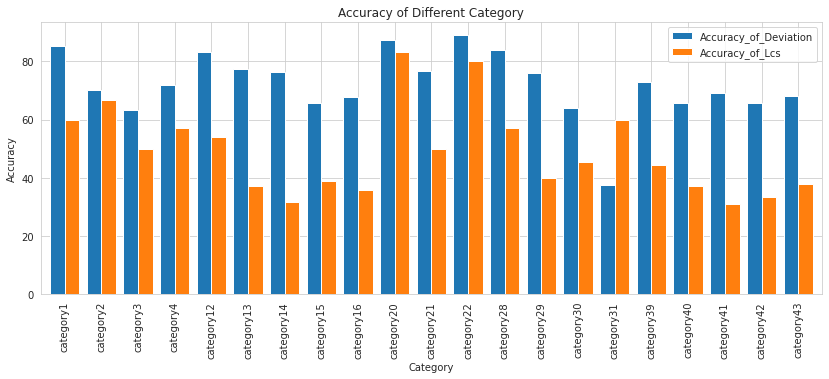

In [78]:
x= 'Category'
y= ['Accuracy_of_Deviation','Accuracy_of_Lcs']

Accuracy.plot(x, y, kind="bar",figsize=(14,5),width=.80)
plt.title("Accuracy of Different Category")
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

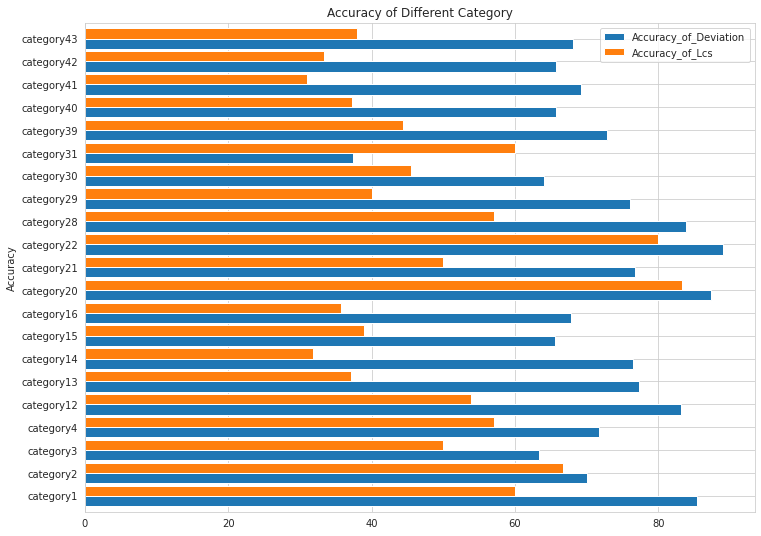

In [88]:
x= 'Category'
y= ['Accuracy_of_Deviation','Accuracy_of_Lcs']

Accuracy.plot(x, y, kind="barh",figsize=(12,9),width=.90)
plt.title("Accuracy of Different Category")
plt.ylabel('Accuracy')

In [72]:
knn_m ={ 
    "KNN":['deviation_accuracy','lcs_accuracy'],
    "Accuracy":[avg_dev,avg_lcs]
    }
knn_model = pd.DataFrame(knn_m) 
knn_model.head()

,KNN,Accuracy
0,deviation_accuracy,72.23
1,lcs_accuracy,49.10


Text(0, 0.5, 'Accuracy')

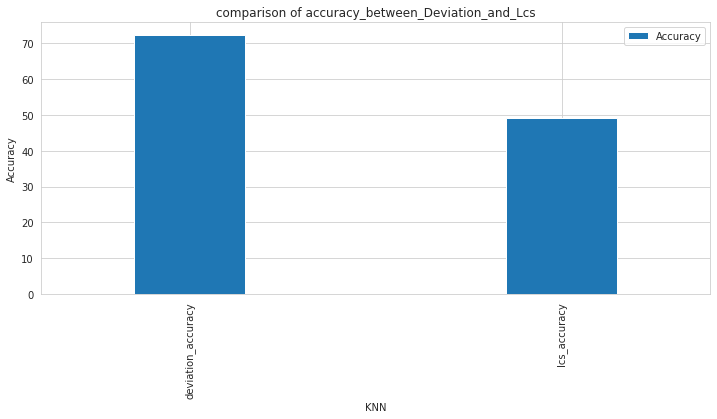

In [73]:
x= 'KNN'
y= ['Accuracy']

knn_model.plot(x, y, kind="bar",figsize=(12,5),width=.30)
plt.title("comparison of accuracy_between_Deviation_and_Lcs")
plt.ylabel('Accuracy')

In [95]:
train_f20.head(10)

,INST_.1,20
0,2302,0.3315
1,2301,0.3315
2,2300,0.3315
3,1375,0.2980
4,1376,0.2980
5,1227,0.1755
6,1226,0.1755
7,1801,0.1160
8,1102,0.0690
9,1928,0.0345
